# Getting Started Notes

Project FAQs can be found (or added to) [here](https://docs.google.com/spreadsheets/d/1Av01IrDMITM5haDGDFq1DemD4W28fDLjJD9S9ewUQig/edit?usp=sharing)

1) you'll want to accept the invitation to the Neo4j Aura Tenant, which may require you to create an account (free)

2) go to [the Neo4j Aura console](console.neo4j.io) to log in

3) once logged in, find the "BTT AI ACN" Organization/Tenant

4) there are 2 'instances' in the project, you are interested in "TechNewsGraph_BTT"
- Note: data is still being loaded to this graph

5) if you "open" this instance, you're taken to a Neo4j Workspace where you can

- query the graph (Neo4j's query language is called "Cypher", and AI assistants know a bit about how to write Cypher)
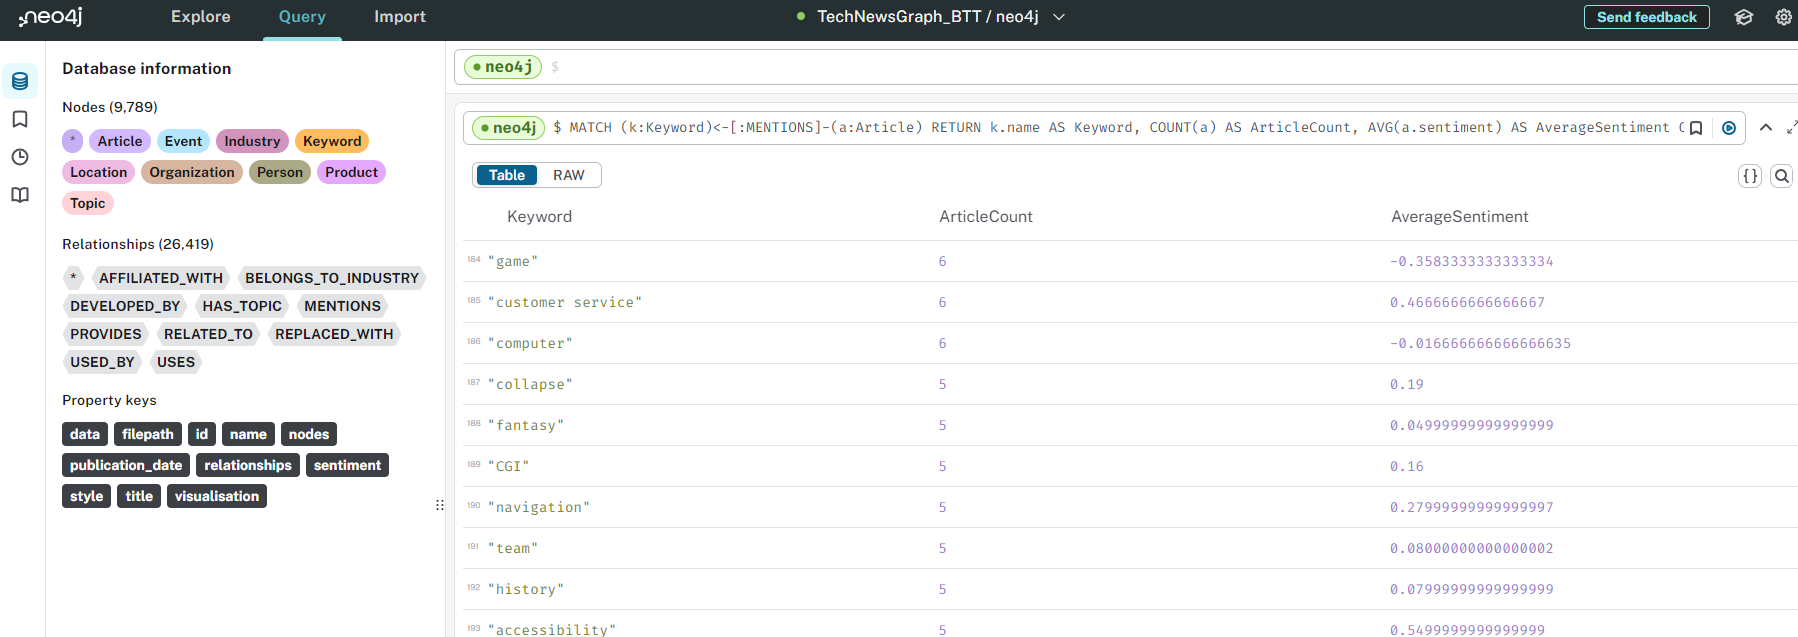

- visualize/explore the graph
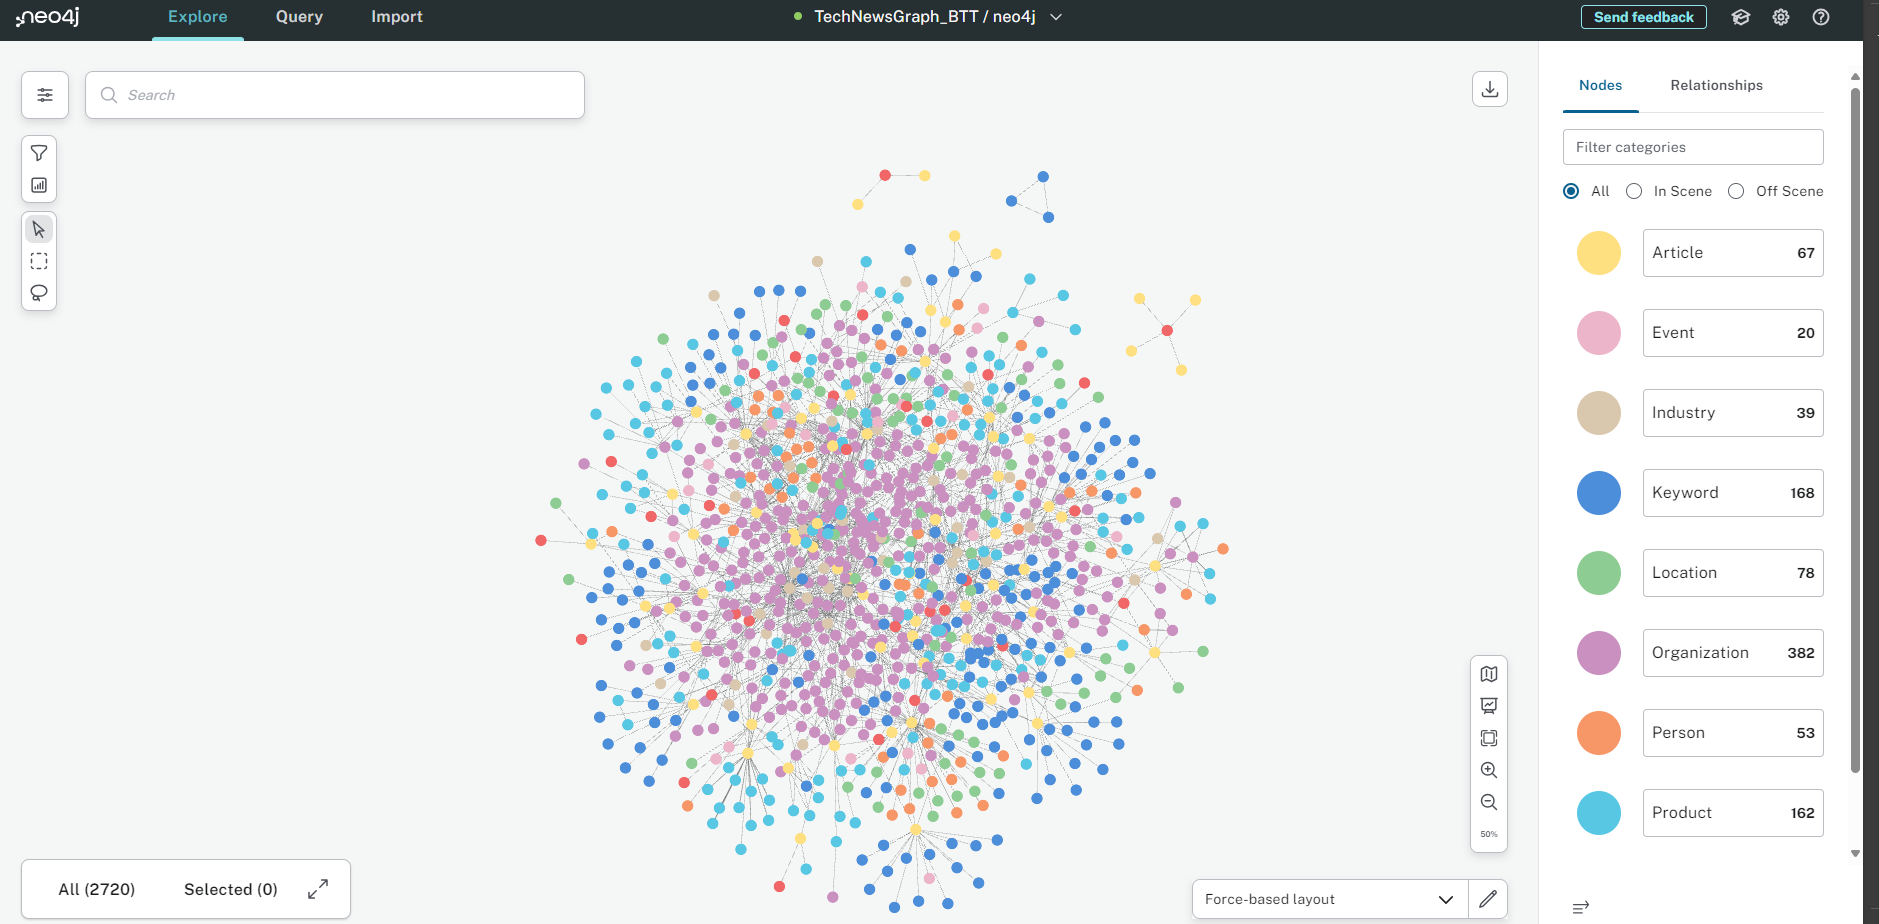


# Setup

In [ ]:
!pip install neo4j

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.7/301.7 kB 6.1 MB/s eta 0:00:00


# Connect to the Database

In [ ]:
# Import libraries
import pandas as pd
from neo4j import GraphDatabase

Note: there are multiple instances of the graph, so it's not catastrophic if this happens, but do not use any DELETE commands, since it's possible to do so with this key

In [ ]:
neo4j_pass_prof = ""
driver = GraphDatabase.driver("neo4j+s://2003b312.databases.neo4j.io", auth=("neo4j", neo4j_pass_prof))

In [ ]:
def query_article_date_range():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)
            WHERE a.publication_date IS NOT NULL
            RETURN MIN(a.publication_date) AS OldestDate, MAX(a.publication_date) AS NewestDate
            """
        )

        # Extract results
        record = result.single()
        return {"OldestDate": record["OldestDate"], "NewestDate": record["NewestDate"]}

# Call the function
date_range = query_article_date_range()
print(f"Oldest Article Date: {date_range['OldestDate']}")
print(f"Newest Article Date: {date_range['NewestDate']}")


Oldest Article Date: 2014-03-29
Newest Article Date: 2023-11-01


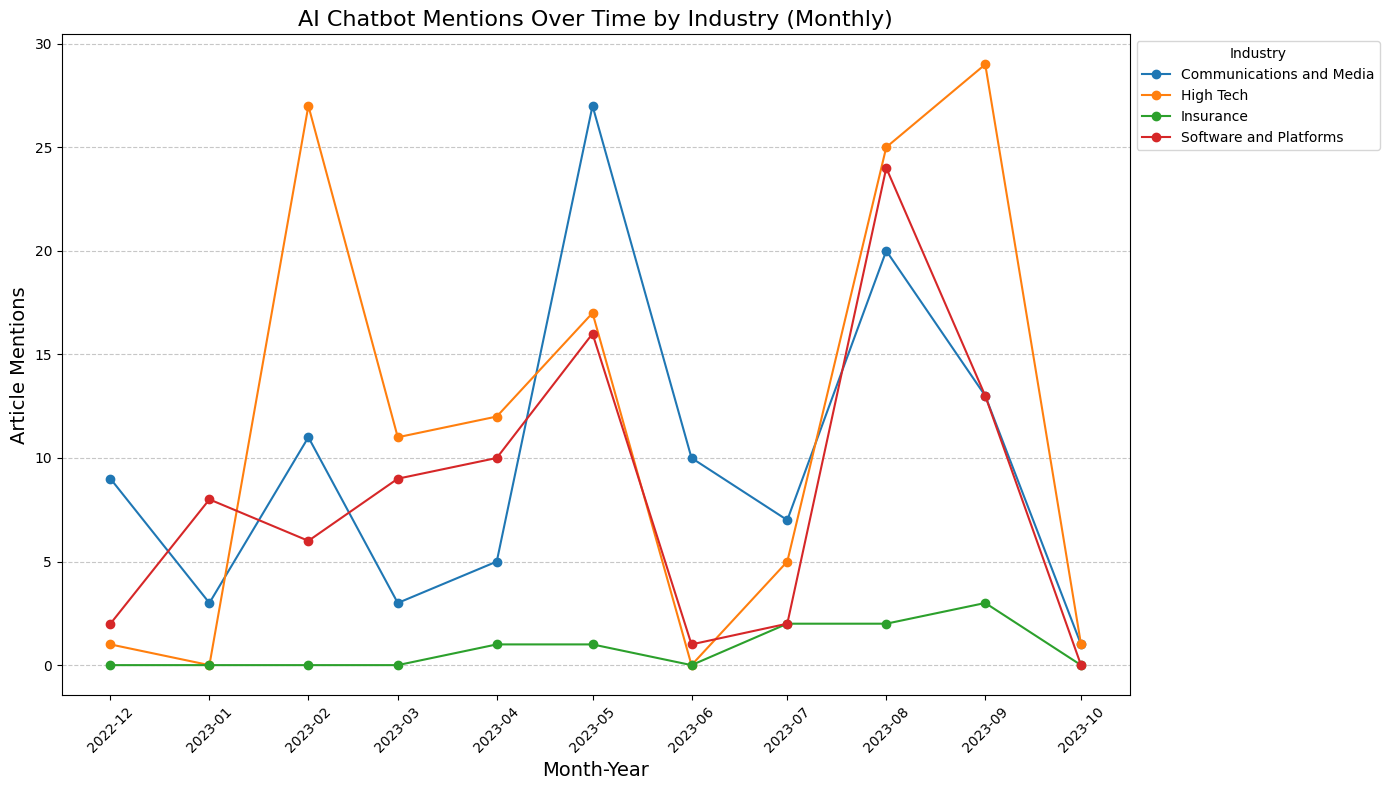

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def query_ai_prevalence_trend():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[:MENTIONS]->(k:Keyword),
                  (a)-[:MENTIONS]->(:Organization)-[:BELONGS_TO_INDUSTRY]->(i:Industry)
            WHERE k.name IN ['chatbot', 'intelligent assistant', 'automated assistant', 'conversational AI', 'conversation AI', 'ChatGPT', 'Google Bard', 'Jasper AI', 'IBM Watson', 'Microsoft Cortana', 'customer service bot', 'support assistant', 'virtual teller', 'NLP', 'bot', 'Amazon Alexa', 'dall-e', 'perplexity', 'AI assistant', 'virtual assistant', 'AI chatbot', 'communication']
              AND i.name IN ['Insurance', 'Software and Platforms', 'Communications and Media', 'High Tech']
              AND a.publication_date IS NOT NULL
            WITH i.name AS Industry, date.truncate('month', a.publication_date) AS YearMonth, COUNT(a) AS ArticleCount
            RETURN Industry, YearMonth, ArticleCount
            ORDER BY YearMonth, Industry
            """
        )

        # Convert the query results to a DataFrame
        data = [{"Industry": record["Industry"], "YearMonth": record["YearMonth"], "ArticleCount": record["ArticleCount"]} for record in result]
        df = pd.DataFrame(data)

        return df

# Query the database and get the data
ai_prevalence_trend_df = query_ai_prevalence_trend()

# Convert YearMonth to a proper datetime format
ai_prevalence_trend_df['YearMonth'] = pd.to_datetime(ai_prevalence_trend_df['YearMonth'].astype(str))

# Pivot the DataFrame to prepare for plotting
trend_pivot = ai_prevalence_trend_df.pivot(index="YearMonth", columns="Industry", values="ArticleCount").fillna(0)

# Plot the line graph
plt.figure(figsize=(14, 8))
for column in trend_pivot.columns:
    plt.plot(trend_pivot.index, trend_pivot[column], marker="o", label=column)

plt.title("AI Chatbot Mentions Over Time by Industry (Monthly)", fontsize=16)
plt.xlabel("Month-Year", fontsize=14)
plt.ylabel("Article Mentions", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Industry", loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


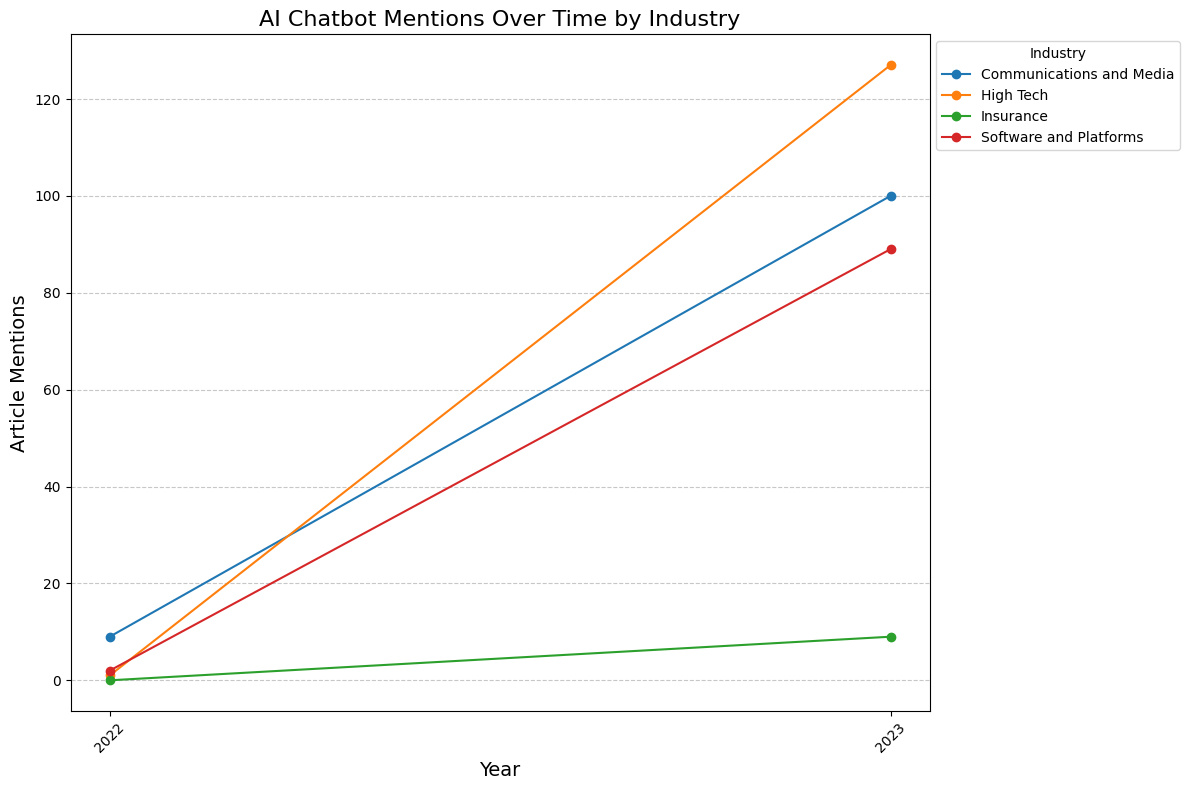

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def query_ai_prevalence_trend():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[:MENTIONS]->(k:Keyword),
                  (a)-[:MENTIONS]->(:Organization)-[:BELONGS_TO_INDUSTRY]->(i:Industry)
            WHERE k.name IN ['chatbot', 'intelligent assistant', 'automated assistant', 'conversational AI', 'conversation AI', 'ChatGPT', 'Google Bard', 'Jasper AI', 'IBM Watson', 'Microsoft Cortana', 'customer service bot', 'support assistant', 'virtual teller', 'NLP', 'bot', 'Amazon Alexa', 'dall-e', 'perplexity', 'AI assistant', 'virtual assistant', 'AI chatbot', 'communication']
              AND i.name IN ['Insurance', 'Software and Platforms', 'Communications and Media', 'High Tech']
              AND a.publication_date IS NOT NULL
            WITH i.name AS Industry, date.truncate('year', a.publication_date) AS Year, COUNT(a) AS ArticleCount
            RETURN Industry, Year, ArticleCount
            ORDER BY Year, Industry
            """
        )

        # Convert the query results to a DataFrame
        data = [{"Industry": record["Industry"], "Year": record["Year"], "ArticleCount": record["ArticleCount"]} for record in result]
        df = pd.DataFrame(data)

        return df

# Query the database and get the data
ai_prevalence_trend_df = query_ai_prevalence_trend()

# Convert Year to string or datetime
ai_prevalence_trend_df['Year'] = pd.to_datetime(ai_prevalence_trend_df['Year'].astype(str)).dt.year

# Pivot the DataFrame to prepare for plotting
trend_pivot = ai_prevalence_trend_df.pivot(index="Year", columns="Industry", values="ArticleCount").fillna(0)

# Plot the line graph
plt.figure(figsize=(12, 8))
for column in trend_pivot.columns:
    plt.plot(trend_pivot.index, trend_pivot[column], marker="o", label=column)

plt.title("AI Chatbot Mentions Over Time by Industry", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Article Mentions", fontsize=14)
plt.xticks(trend_pivot.index, rotation=45)
plt.legend(title="Industry", loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


# View Database Schema

you might want to do this, so you can get a little help, like I did [here](https://chatgpt.com/share/66eb9dfd-4440-8001-8f6b-92ce6292ae6f)

In [ ]:
# view graph schema
def get_graph_schema():
    with driver.session() as session:
        # Run the APOC procedure to get the schema
        result = session.run(
            """
            CALL apoc.meta.schema()
            """
        )
        # Extract the schema information
        schema = result.single()
        return schema

# Usage
graph_schema = get_graph_schema()
display(graph_schema)

<Record value={'Keyword': {'count': 1877, 'labels': [], 'properties': {'name': {'unique': False, 'indexed': False, 'type': 'STRING', 'existence': False}}, 'type': 'node', 'relationships': {'HAS_TOPIC': {'count': 0, 'direction': 'out', 'labels': ['Topic', 'Article', 'Product', 'Event'], 'properties': {}}, 'MENTIONS': {'count': 30555, 'direction': 'in', 'labels': ['Article', 'Organization', 'Person', 'Product'], 'properties': {}}, 'AFFILIATED_WITH': {'count': 1077, 'direction': 'in', 'labels': ['Person'], 'properties': {}}, 'USES': {'count': 84, 'direction': 'in', 'labels': ['Product'], 'properties': {}}, 'RELATED_TO': {'count': 20, 'direction': 'out', 'labels': ['Keyword', 'Product', 'Organization', 'Person', 'Product', 'Location', 'Event', 'Keyword'], 'properties': {}}, 'BELONGS_TO_INDUSTRY': {'count': 0, 'direction': 'out', 'labels': ['Industry', 'Organization'], 'properties': {}}, 'USED_BY': {'count': 21, 'direction': 'in', 'labels': ['Organization', 'Product', 'Event'], 'properties'

# Node Summaries

In [ ]:
def get_node_type_counts():
    with driver.session() as session:
        # Run the Cypher query
        result = session.run(
            """
            MATCH (n)
            RETURN labels(n) AS NodeType, COUNT(n) AS Count
            ORDER BY Count DESC
            """
        )

        # Extract results and convert to a pandas DataFrame
        data = [{"NodeType": record["NodeType"], "Count": record["Count"]} for record in result]
        df = pd.DataFrame(data)

        return df

# Retrieve the node type counts and display as a DataFrame
node_type_counts_df = get_node_type_counts()
display(node_type_counts_df)

NodeType  Count
0  [Organization]  11155
1        [Entity]   4160
2       [Product]   4143
3       [Article]   3684
4       [Keyword]   1877
5        [Person]   1651
6      [Location]    762
7         [Event]    625
8      [Industry]    249
9         [Topic]     89

In [ ]:
from IPython.display import display, HTML
import pandas as pd

def get_banking_articles():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[:MENTIONS]->(:Organization)-[:BELONGS_TO_INDUSTRY]->(i:Industry {name: 'Banking'})
            WHERE a.title IS NOT NULL AND a.publication_date IS NOT NULL
            RETURN a.title AS ArticleTitle, a.publication_date AS PublicationDate
            ORDER BY PublicationDate DESC
            """
        )
        data = [{"ArticleTitle": record["ArticleTitle"], "PublicationDate": record["PublicationDate"]} for record in result]
        return pd.DataFrame(data)

# Get the data
df = get_banking_articles()

# Display as a scrollable table
def display_scrollable_table(df):
    html = df.to_html(index=False)
    styled_html = f"""
    <div style="overflow-y: scroll; height: 300px; border: 1px solid black; padding: 10px;">
        {html}
    </div>
    """
    display(HTML(styled_html))

# Call the function to display
display_scrollable_table(df)
df = get_banking_articles()

with open("scrollable_table.html", "w") as f:
    html = df.to_html(index=False)
    styled_html = f"""
    <div style="overflow-y: scroll; height: 300px; border: 1px solid black; padding: 10px;">
        {html}
    </div>
    """
    f.write(styled_html)


TypeError: float() argument must be a string or a real number, not 'Date'

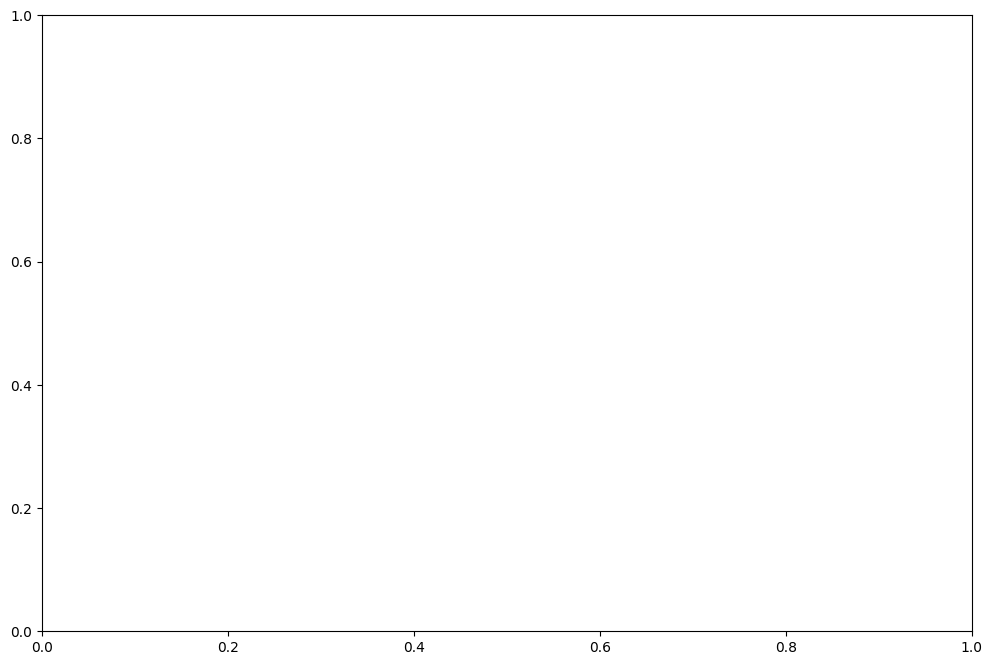

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def query_ai_prevalence_trend():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[:MENTIONS]->(k:Keyword),
                  (a)-[:MENTIONS]->(:Organization)-[:BELONGS_TO_INDUSTRY]->(i:Industry)
            WHERE k.name IN ['chatbot', 'intelligent assistant', 'automated assistant', 'conversational AI', 'conversation AI', 'ChatGPT', 'Google Bard', 'Jasper AI', 'IBM Watson', 'Microsoft Cortana', 'customer service bot', 'support assistant', 'virtual teller', 'NLP', 'bot', 'Amazon Alexa', 'dall-e', 'perplexity', 'AI assistant', 'virtual assistant', 'AI chatbot', 'communication']
              AND i.name IN ['Insurance', 'Software and Platforms', 'Communications and Media', 'High Tech']
              AND a.publication_date IS NOT NULL
            WITH i.name AS Industry, date.truncate('year', a.publication_date) AS Year, COUNT(a) AS ArticleCount
            RETURN Industry, Year, ArticleCount
            ORDER BY Year, Industry
            """
        )

        # Convert the query results to a DataFrame
        data = [{"Industry": record["Industry"], "Year": record["Year"], "ArticleCount": record["ArticleCount"]} for record in result]
        df = pd.DataFrame(data)

        return df

# Query the database and get the data
ai_prevalence_trend_df = query_ai_prevalence_trend()

# Pivot the DataFrame to prepare for plotting
trend_pivot = ai_prevalence_trend_df.pivot(index="Year", columns="Industry", values="ArticleCount").fillna(0)

# Plot the line graph
plt.figure(figsize=(12, 8))
for column in trend_pivot.columns:
    plt.plot(trend_pivot.index, trend_pivot[column], marker="o", label=column)

plt.title("AI Chatbot Mentions Over Time by Industry", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Article Mentions", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Industry", loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


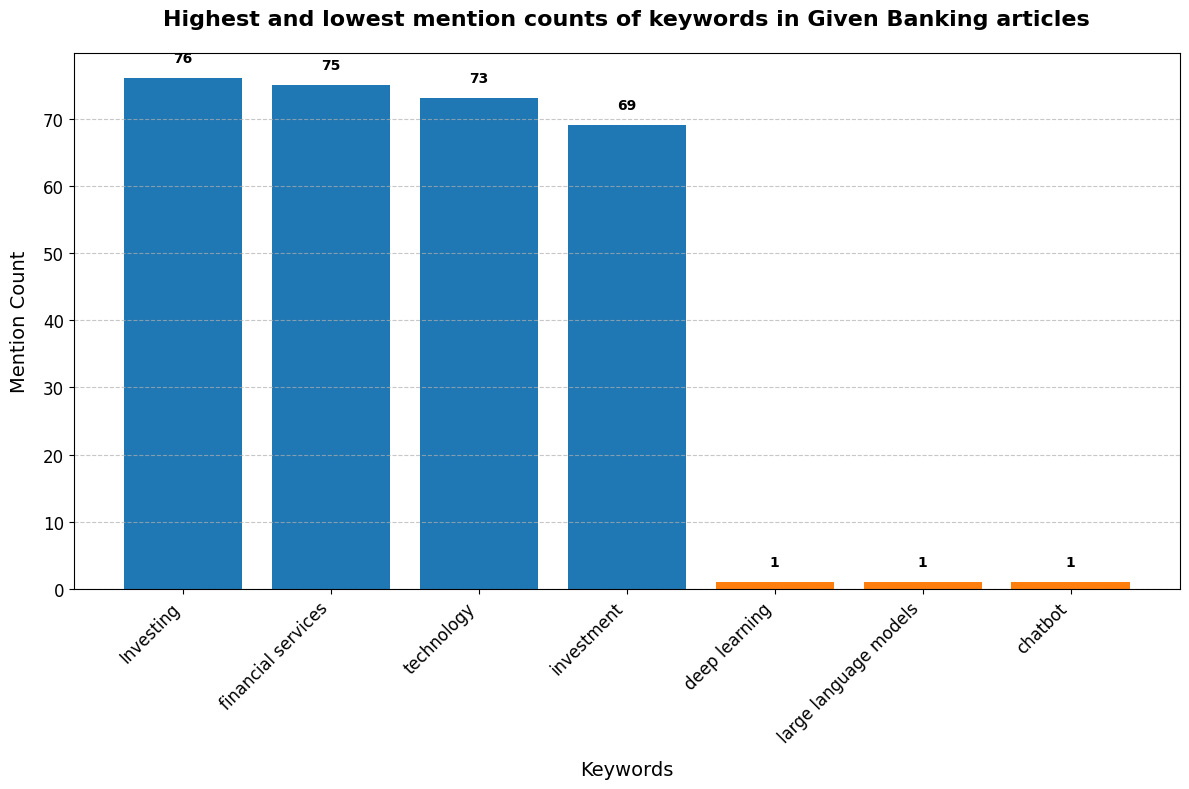

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_selected_banking_keywords():
    # Simulated data (Replace this with the output of `get_banking_keywords()`)
    data = [
        {"Keyword": "Investing", "MentionCount": 76},
        {"Keyword": "financial services", "MentionCount": 75},
        {"Keyword": "technology", "MentionCount": 73},
        {"Keyword": "investment", "MentionCount": 69},
        {"Keyword": "service", "MentionCount": 67},
        {"Keyword": "deep learning", "MentionCount": 1},
        {"Keyword": "large language models", "MentionCount": 1},
        {"Keyword": "chatbot", "MentionCount": 1},
    ]

    # Convert to DataFrame
    df = pd.DataFrame(data)

    # Filter for the top 4 keywords and the specified ones
    selected_keywords = ["Investing", "financial services", "technology", "investment", "deep learning", "large language models", "chatbot"]
    filtered_df = df[df["Keyword"].isin(selected_keywords)]

    # Sort keywords by Mention Count for a better visual order
    filtered_df = filtered_df.sort_values("MentionCount", ascending=False)

    # Plot the data
    plt.figure(figsize=(12, 8))
    bars = plt.bar(filtered_df["Keyword"], filtered_df["MentionCount"], color=["#1f77b4" if count > 10 else "#ff7f0e" for count in filtered_df["MentionCount"]])

    # Add data labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 2,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=10,
            fontweight='bold'
        )

    # Add title and labels
    plt.title("Highest and lowest mention counts of keywords in Given Banking articles", fontsize=16, fontweight='bold', pad=20)
    plt.xlabel("Keywords", fontsize=14, labelpad=10)
    plt.ylabel("Mention Count", fontsize=14, labelpad=10)
    plt.xticks(rotation=45, ha="right", fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Show the plot
    plt.show()

# Call the function
plot_selected_banking_keywords()


In [ ]:
def query_keyword_sentiment_banking():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[:MENTIONS]->(k:Keyword),
                  (a)-[:MENTIONS]->(:Organization)-[:BELONGS_TO_INDUSTRY]->(i:Industry {name: 'Banking'})
            WHERE a.sentiment IS NOT NULL
            RETURN k.name AS Keyword, AVG(a.sentiment) AS AvgSentiment, COUNT(a) AS MentionCount
            ORDER BY AvgSentiment DESC
            """
        )

        # Convert the query results to a DataFrame
        data = [{"Keyword": record["Keyword"], "AvgSentiment": record["AvgSentiment"]} for record in result]
        return pd.DataFrame(data)

# Fetch data
banking_sentiment_df = query_keyword_sentiment_banking()


# Identify the top 3 and worst 3 keywords based on average sentiment
top_keywords = banking_sentiment_df.nlargest(3, 'AvgSentiment')
worst_keywords = banking_sentiment_df.nsmallest(3, 'AvgSentiment')

# Combine top and worst keywords for visualization
selected_keywords = pd.concat([top_keywords, worst_keywords])

print("Top 3 Keywords:")
print(top_keywords)

print("\nWorst 3 Keywords:")
print(worst_keywords)


Top 3 Keywords:
            Keyword  AvgSentiment
0     observability          0.85
1  security threats          0.85
2   cloud computing          0.85

Worst 3 Keywords:
               Keyword  AvgSentiment
811  security concerns         -0.85
812          user base         -0.85
813    user engagement         -0.85


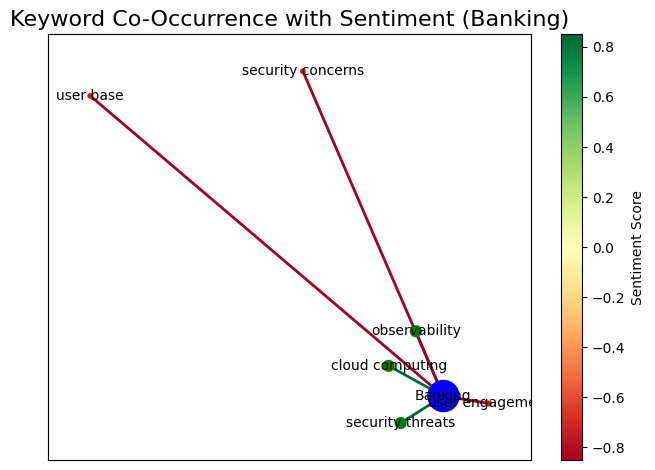

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_keyword_sentiment_graph(df):
    # Create a graph
    G = nx.Graph()

    # Add nodes and edges
    for _, row in df.iterrows():
        # Add keyword nodes with size, sentiment, and node color based on sentiment
        node_color = 'green' if row["AvgSentiment"] > 0 else 'red'
        G.add_node(row["Keyword"], size=row["MentionCount"], sentiment=row["AvgSentiment"], color=node_color)
        # Add an edge between "Banking" and the keyword
        G.add_edge("Banking", row["Keyword"], weight=row["AvgSentiment"])

    # Add the central "Banking" node explicitly with blue color
    G.add_node("Banking", size=50, color='blue')

    # Positioning
    pos = nx.spring_layout(G, seed=42)

    # Draw nodes with size proportional to mention count
    node_sizes = [G.nodes[node].get("size", 10) * 10 for node in G.nodes]
    node_colors = [G.nodes[node]["color"] for node in G.nodes]
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors)

    # Draw edges with color proportional to sentiment
    edge_colors = [G[u][v]["weight"] for u, v in G.edges]
    edges = nx.draw_networkx_edges(G, pos, edge_color=edge_colors, edge_cmap=plt.cm.RdYlGn, width=2)

    # Add labels
    nx.draw_networkx_labels(G, pos, font_size=10)

    # Add colorbar for edge colors
    sm = plt.cm.ScalarMappable(cmap=plt.cm.RdYlGn, norm=plt.Normalize(vmin=min(edge_colors), vmax=max(edge_colors)))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=plt.gca(), orientation="vertical", label="Sentiment Score")

    # Title and legend
    plt.title("Keyword Co-Occurrence with Sentiment (Banking)", fontsize=16)
    plt.tight_layout()

    plt.show()

# Plot the graph
plot_keyword_sentiment_graph(selected_keywords)


In [ ]:
def get_banking_keywords():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[:MENTIONS]->(k:Keyword),
                  (a)-[:MENTIONS]->(:Organization)-[:BELONGS_TO_INDUSTRY]->(i:Industry {name: 'Banking'})
            RETURN k.name AS Keyword, COUNT(*) AS MentionCount
            ORDER BY MentionCount DESC
            """
        )
        data = [{"Keyword": record["Keyword"], "MentionCount": record["MentionCount"]} for record in result]
        return pd.DataFrame(data)
display(get_banking_keywords())

Keyword  MentionCount
0                Investing            76
1       financial services            75
2               technology            73
3               investment            69
4                  service            67
..                     ...           ...
813            trustworthy             1
814                chatbot             1
815  large language models             1
816                 agency             1
817          deep learning             1

[818 rows x 2 columns]

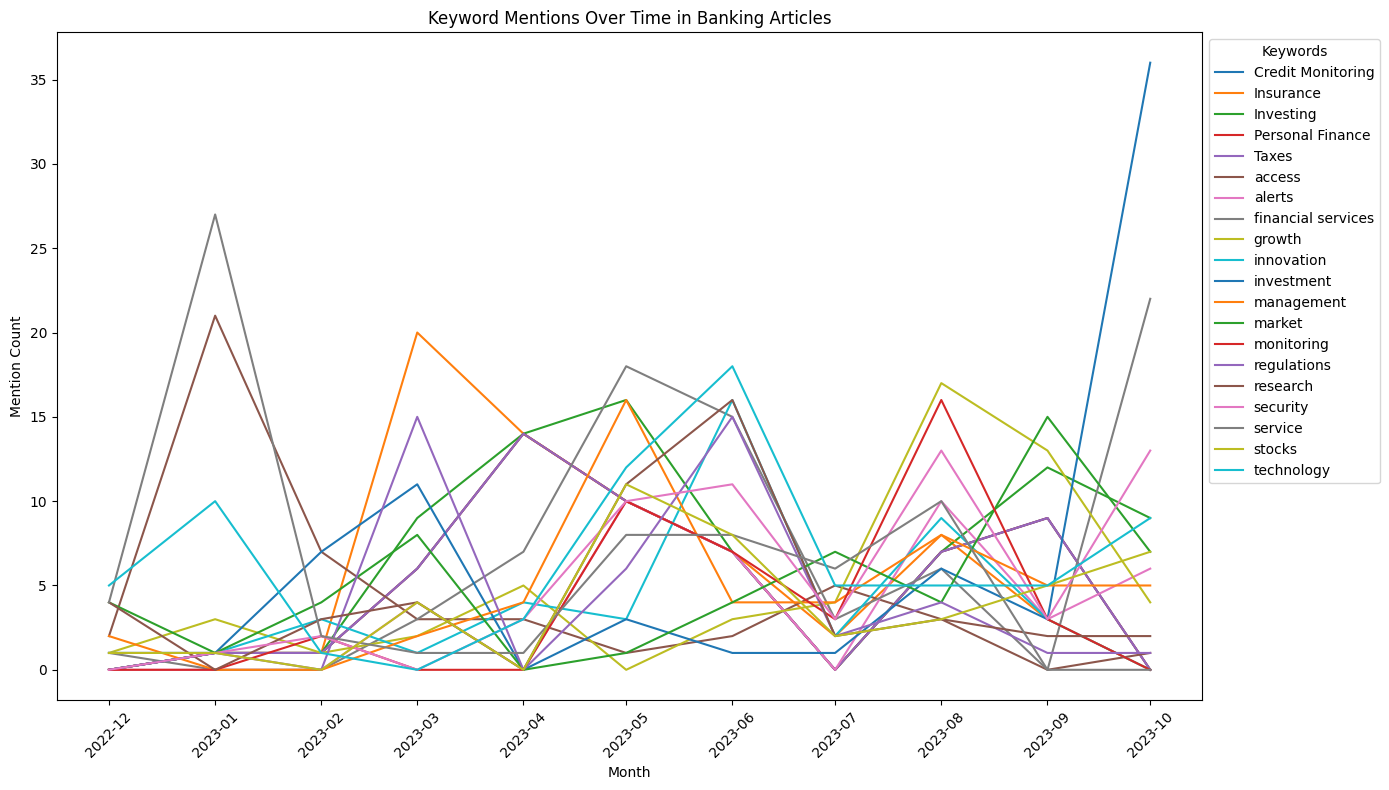

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def get_keyword_timeline():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[:MENTIONS]->(k:Keyword),
                  (a)-[:MENTIONS]->(:Organization)-[:BELONGS_TO_INDUSTRY]->(i:Industry {name: 'Banking'})
            WHERE a.publication_date IS NOT NULL
            RETURN k.name AS Keyword, date.truncate('month', a.publication_date) AS Month, COUNT(*) AS MentionCount
            ORDER BY Month ASC
            """
        )
        data = [{"Keyword": record["Keyword"], "Month": record["Month"], "MentionCount": record["MentionCount"]} for record in result]
        df = pd.DataFrame(data)

    # Convert the Month column to a proper datetime object
    df['Month'] = pd.to_datetime(df['Month'].astype(str), errors='coerce')

    # Filter only the top 20 keywords
    top_keywords = [
        "Investing", "financial services", "technology", "investment", "service",
        "Insurance", "security", "Credit Monitoring", "Taxes", "market",
        "Personal Finance", "growth", "management", "access", "research",
        "regulations", "innovation", "stocks", "monitoring", "alerts"
    ]
    df = df[df["Keyword"].isin(top_keywords)]

    # Pivot the data to create a timeline
    timeline_df = df.pivot_table(index="Month", columns="Keyword", values="MentionCount", aggfunc="sum").fillna(0)

    # Plot the timeline
    plt.figure(figsize=(14, 8))
    for keyword in timeline_df.columns:
        plt.plot(timeline_df.index, timeline_df[keyword], label=keyword)

    plt.title("Keyword Mentions Over Time in Banking Articles")
    plt.xlabel("Month")
    plt.ylabel("Mention Count")
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Keywords")
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()

# Call the function
get_keyword_timeline()


In [ ]:
def get_banking_organizations_using_software():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (o:Organization)-[:USES]->(p:Product)-[:BELONGS_TO_INDUSTRY]->(i:Industry {name: 'Software and Platforms'}),
                  (o)-[:BELONGS_TO_INDUSTRY]->(b:Industry {name: 'Banking'})
            RETURN o.name AS Bank, p.name AS SoftwareProduct
            LIMIT 20
            """
        )
        data = [{"Bank": record["Bank"], "SoftwareProduct": record["SoftwareProduct"]} for record in result]
        return pd.DataFrame(data)
display(get_banking_organizations_using_software())

Empty DataFrame
Columns: []
Index: []

In [ ]:
def get_industry_labels():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (o:Organization)-[:USES]->(p:Product)-[:BELONGS_TO_INDUSTRY]->(i:Industry {name: 'Software and Platforms'}),
                  (o)-[:BELONGS_TO_INDUSTRY]->(b:Industry {name: 'Banking'})
            RETURN o.name AS Bank, p.name AS SoftwareProduct, COUNT(p) AS ProductUsage
            ORDER BY ProductUsage DESC
            LIMIT 10
            """
        )

        # Extract data into a list of dictionaries
        data = [{"Labels": record["Labels"]} for record in result]

        # Create a DataFrame
        df = pd.DataFrame(data)

        return df

# Display the results
display(get_industry_labels())


Labels
0  [Industry]

In [ ]:
def get_fraud_detection_ai_in_banking():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (b:Bank)-[:USES]->(f:Feature {name: 'Fraud Detection'})
            MATCH (b)<-[:MENTIONS]-(a:Article)
            RETURN b.name AS Bank, AVG(a.sentiment) AS average_sentiment, COUNT(a) AS article_count
            ORDER BY article_count DESC
            LIMIT 10
            """
        )

        data = [{"Bank": record["Bank"], "average_sentiment": record["average_sentiment"], "article_count": record["article_count"]} for record in result]
        df = pd.DataFrame(data)

        return df


# Sentiment by Keyword

In [ ]:
def get_average_sentiment_for_keywords():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (k:Keyword)<-[:MENTIONS]-(a:Article)
            RETURN k.name AS Keyword, AVG(a.sentiment) AS average_sentiment
            ORDER BY average_sentiment DESC
            LIMIT 10
            """
        )

        # Convert results to DataFrame
        data = [{"Keyword": record["Keyword"], "average_sentiment": record["average_sentiment"]} for record in result]
        df = pd.DataFrame(data)

        return df

# Usage
average_sentiment_df = get_average_sentiment_for_keywords()
display(average_sentiment_df)


Keyword  average_sentiment
0            give                NaN
1    Saudi Arabia                NaN
2             GPS               0.90
3      commitment               0.90
4  cinematography               0.85
5     perspective               0.85
6    customisable               0.85
7       prismatic               0.85
8      excellence               0.85
9     carbonfibre               0.85

# Article Count by Topic/Date

In [ ]:
def get_article_count_by_topic_and_date():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[:HAS_TOPIC]->(t:Topic)
            WITH t.name AS topic_name, date(a.publication_date) AS pub_date, a
            RETURN topic_name, pub_date.year AS year, pub_date.month AS month, COUNT(a) AS article_count
            ORDER BY topic_name, year, month
            """
        )

        # Convert results to DataFrame
        data = [{"topic_name": record["topic_name"], "year": record["year"], "month": record["month"], "article_count": record["article_count"]} for record in result]
        df = pd.DataFrame(data)

        return df

# Usage
article_count_by_topic_and_date_df = get_article_count_by_topic_and_date()
display(article_count_by_topic_and_date_df)


topic_name    year  month  article_count
0           5G Technology  2022.0   12.0              3
1           5G Technology  2023.0    1.0              4
2           5G Technology  2023.0    2.0              3
3           5G Technology  2023.0    3.0              4
4           5G Technology  2023.0    4.0              3
..                    ...     ...    ...            ...
365  Virtual Reality (VR)  2023.0    4.0              1
366  Virtual Reality (VR)  2023.0    5.0              2
367  Virtual Reality (VR)  2023.0    7.0              1
368  Virtual Reality (VR)  2023.0    8.0              2
369       Web Development  2021.0    1.0              1

[370 rows x 4 columns]

# Keyword Co-Occurrence

In [ ]:
def get_keyword_co_occurrence():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[:MENTIONS]->(k1:Keyword), (a)-[:MENTIONS]->(k2:Keyword)
            WHERE k1 <> k2
            RETURN k1.name AS Keyword1, k2.name AS Keyword2, COUNT(a) AS co_occurrence_count
            ORDER BY co_occurrence_count DESC
            LIMIT 1000
            """
        )

        # Convert results to DataFrame
        data = [{"Keyword1": record["Keyword1"], "Keyword2": record["Keyword2"], "co_occurrence_count": record["co_occurrence_count"]} for record in result]
        df = pd.DataFrame(data)

        return df

# Usage
keyword_co_occurrence_df = get_keyword_co_occurrence()
display(keyword_co_occurrence_df.sample(10))



Keyword1       Keyword2  co_occurrence_count
353      news         report                    8
594  settings     experience                    7
771    growth       forecast                    6
867     daily           news                    6
393  register    preferences                    7
731   network         system                    6
308   article         access                    8
607    server    permissions                    7
871  response  authorization                    6
152  services       response                   11

# Article Count by Topic

In [ ]:
def get_article_count_by_topic():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[:HAS_TOPIC]->(t:Topic)
            RETURN t.name AS topic_name, COUNT(a) AS article_count
            ORDER BY article_count DESC
            LIMIT 10
            """
        )

        # Convert results to DataFrame
        data = [{"topic_name": record["topic_name"], "article_count": record["article_count"]} for record in result]
        df = pd.DataFrame(data)

        return df

# Usage
article_count_by_topic_df = get_article_count_by_topic()
display(article_count_by_topic_df)


topic_name  article_count
0                            Artificial Intelligence            226
1                       Digital Payments and Fintech             79
2                                      Cybersecurity             63
3                                         Blockchain             47
4  Consumer Electronics (e.g., smartphones, weara...             46
5                             Digital Transformation             43
6                                    Cloud Computing             37
7      Automotive Technology and Autonomous Vehicles             35
8                              Healthcare Technology             34
9                                      5G Technology             30

# Top Keywords by Topic

In [ ]:
def get_mentions_of_keywords_by_topic():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[:HAS_TOPIC]->(t:Topic), (a)-[:MENTIONS]->(k:Keyword)
            RETURN t.name AS topic_name, k.name AS keyword, COUNT(a) AS mention_count
            ORDER BY topic_name, mention_count DESC
            """
        )

        # Convert results to DataFrame
        data = [{"topic_name": record["topic_name"], "keyword": record["keyword"], "mention_count": record["mention_count"]} for record in result]
        df = pd.DataFrame(data)

        return df

# Usage
mentions_of_keywords_by_topic_df = get_mentions_of_keywords_by_topic()
display(mentions_of_keywords_by_topic_df)


topic_name     keyword  mention_count
0            5G Technology     telecom              7
1            5G Technology      trends              7
2            5G Technology  technology              6
3            5G Technology  challenges              6
4            5G Technology    insights              5
...                    ...         ...            ...
2002  Virtual Reality (VR)  experience              1
2003  Virtual Reality (VR)    software              1
2004  Virtual Reality (VR)   solutions              1
2005  Virtual Reality (VR)    advanced              1
2006  Virtual Reality (VR)     testing              1

[2007 rows x 3 columns]

# Distinct Article Count by Industry

In [ ]:
def get_article_count_by_industry():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[]->(n)-[:BELONGS_TO_INDUSTRY]->(i:Industry)
            RETURN i.name AS industry, COUNT(DISTINCT a) AS article_count
            ORDER BY article_count DESC
            LIMIT 10
            """
        )

        # Convert results to DataFrame
        data = [{"industry_name": record["industry"], "article_count": record["article_count"]} for record in result]
        df = pd.DataFrame(data)

        return df

# Usage
article_count_by_industry_df = get_article_count_by_industry()
display(article_count_by_industry_df)


industry_name  article_count
0     Communications and Media           1979
1       Software and Platforms           1516
2                    High Tech           1400
3               Public Service           1161
4  Consumer Goods and Services            954
5                      Banking            799
6                       Health            701
7              Capital Markets            632
8                       Retail            491
9        US Federal Government            364

# Sentiment Analysis and Trend Forecasting

In [ ]:
def get_sentiment_trend_keyword():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (k:Keyword)<-[:MENTIONS]-(a:Article)
            WHERE a.publication_date IS NOT NULL AND a.sentiment IS NOT NULL
            WITH k.name AS keyword,
                date.truncate('month', a.publication_date) AS month_year,
                a.sentiment AS sentiment
            RETURN keyword,
                month_year.year AS year,
                month_year.month AS month,
                AVG(sentiment) AS avg_sentiment
            ORDER BY year, month, keyword;
            """
        )

        # Convert results to DataFrame
        data = [{"keyword": record["keyword"], "year": record["year"], "month": record["month"], "avg_sentiment": record["avg_sentiment"]} for record in result]
        df = pd.DataFrame(data)

        return df

# Usage
sentiment_trend_keyword_df = get_sentiment_trend_keyword()
display(sentiment_trend_keyword_df)


keyword  year  month  avg_sentiment
0                  format  2014      3          0.750
1                    list  2014      3          0.750
2           Breaking News  2019      3          0.100
3           Business News  2019      3          0.100
4     Latest News Updates  2019      3          0.100
...                   ...   ...    ...            ...
6701              website  2023     10         -0.225
6702               weight  2023     10          0.300
6703            workforce  2023     10         -0.200
6704            workshops  2023     10          0.950
6705                world  2023     10          0.800

[6706 rows x 4 columns]

In [ ]:
def get_sentiment_trend_industry():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (i:Industry)<-[:BELONGS_TO_INDUSTRY]-(n)-[:MENTIONS]-(a:Article)
            WHERE a.publication_date IS NOT NULL AND a.sentiment IS NOT NULL
            WITH i.name AS industry,
                date.truncate('month', a.publication_date) AS month_year,
                a.sentiment AS sentiment
            RETURN industry,
                month_year.year AS year,
                month_year.month AS month,
                AVG(sentiment) AS avg_sentiment
            ORDER BY year, month, industry;
            """
        )

        # Convert results to DataFrame
        data = [{"industry": record["industry"], "year": record["year"], "month": record["month"], "avg_sentiment": record["avg_sentiment"]} for record in result]
        df = pd.DataFrame(data)

        return df

# Usage
sentiment_trend_industry_df = get_sentiment_trend_industry()
display(sentiment_trend_industry_df)

industry  year  month  avg_sentiment
0                        Banking  2019      3       0.100000
1       Communications and Media  2019      3       0.400000
2    Consumer Goods and Services  2019      3       0.850000
3                         Health  2019      3       0.100000
4                      High Tech  2019      3       0.850000
..                           ...   ...    ...            ...
249                       Retail  2023     10       0.473913
250       Software and Platforms  2023     10       0.421014
251                       Travel  2023     10      -0.600000
252        US Federal Government  2023     10       0.200000
253                    Utilities  2023     10       0.250000

[254 rows x 4 columns]

**ADDITIONAL CODE**

In [ ]:
def get_article_mentions_by_organization():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[:MENTIONS]->(o:Organization)
            RETURN o.name AS organization, COUNT(a) AS mention_count
            ORDER BY mention_count DESC
            LIMIT 10
            """
        )

        data = [{"organization": record["organization"], "mention_count": record["mention_count"]} for record in result]
        df = pd.DataFrame(data)
        return df

# Usage
article_mentions_df = get_article_mentions_by_organization()
display(article_mentions_df)


organization  mention_count
0        Microsoft            173
1           Google            168
2           Amazon            142
3            Apple            108
4         LinkedIn            105
5           OpenAI             90
6             Meta             63
7              IBM             51
8          Netflix             47
9  The Motley Fool             45

In [ ]:
def get_co_occurrence_with_tech_keywords():
    with driver.session() as session:
        # Step 1: Get the top 10 most mentioned people
        most_mentioned_people_result = session.run(
            """
            MATCH (a:Article)-[:MENTIONS]->(p:Person)
            RETURN p.name AS person, COUNT(a) AS mention_count
            ORDER BY mention_count DESC
            LIMIT 10
            """
        )

        most_mentioned_people = [record["person"] for record in most_mentioned_people_result]

        # Step 2: Get co-occurrence of these people with tech-related keywords
        result = session.run(
            """
            MATCH (a:Article)-[:MENTIONS]->(p:Person), (a)-[:MENTIONS]->(k:Keyword)
            WHERE p.name IN $people
            RETURN p.name AS person, k.name AS keyword, COUNT(a) AS co_occurrence_count
            ORDER BY co_occurrence_count DESC
            LIMIT 20
            """,
            parameters={"people": most_mentioned_people}
        )

        # Convert the results to a DataFrame
        data = [{"person": record["person"],
                 "keyword": record["keyword"],
                 "co_occurrence_count": record["co_occurrence_count"]} for record in result]
        df = pd.DataFrame(data)
        return df

# Usage
co_occurrence_df = get_co_occurrence_with_tech_keywords()
display(co_occurrence_df)


person        keyword  co_occurrence_count
0   Michael Penix Jr.  vulnerability                   19
1       Raheem Morris  vulnerability                   18
2     Zion Williamson  vulnerability                   18
3           Al Pacino  vulnerability                   17
4      Robert De Niro  vulnerability                   17
5          Mike Tyson  vulnerability                   17
6       Harrison Ford  vulnerability                   16
7          Will Smith  vulnerability                   16
8           Jake Paul  vulnerability                   14
9           Al Pacino       collapse                   10
10     Robert De Niro       collapse                   10
11      Raheem Morris       collapse                   10
12         Will Smith       collapse                   10
13  Michael Penix Jr.       collapse                   10
14         Mike Tyson       collapse                   10
15      Harrison Ford       collapse                   10
16          Jake Paul       collapse                    9
17    Zion Williamson       collapse                    9
18      Raheem Morris            CGI                    8
19      Raheem Morris          myths                    8

In [ ]:
from networkx.algorithms import bipartite

def visualize_bipartite_graph():
    # Generate the data
    co_occurrence_df = get_co_occurrence_with_tech_keywords()

    # Create a bipartite graph
    B = nx.Graph()

    # Add nodes with the bipartite attribute
    people = set(co_occurrence_df['person'])
    keywords = set(co_occurrence_df['keyword'])

    B.add_nodes_from(people, bipartite=0, color='skyblue')
    B.add_nodes_from(keywords, bipartite=1, color='salmon')

    # Add edges with weights based on co-occurrence count
    for _, row in co_occurrence_df.iterrows():
        B.add_edge(row['person'], row['keyword'], weight=row['co_occurrence_count'])

    # Layout for bipartite graph
    pos = nx.bipartite_layout(B, people)

    # Draw nodes with different colors for each set
    colors = [B.nodes[n]['color'] for n in B.nodes()]
    plt.figure(figsize=(14, 10))
    nx.draw(B, pos, node_color=colors, with_labels=True, node_size=500, font_size=10)

    # Draw edges with width proportional to co-occurrence count
    edges = nx.get_edge_attributes(B, 'weight')
    nx.draw_networkx_edges(B, pos, width=[v * 0.1 for v in edges.values()], alpha=0.7)

    plt.title("Bipartite Graph of Co-occurrence between People and Tech Keywords")
    plt.show()

# Call the function to visualize
visualize_bipartite_graph()


NameError: name 'nx' is not defined

In [ ]:
def get_top_keywords(limit=10):
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[:MENTIONS]->(k:Keyword)
            RETURN k.name AS keyword, COUNT(a) AS mention_count
            ORDER BY mention_count DESC
            LIMIT $limit
            """,
            parameters={"limit": limit}
        )

        data = [{"keyword": record["keyword"], "mention_count": record["mention_count"]} for record in result]
        df = pd.DataFrame(data)
        return df

# Usage
top_keywords_df = get_top_keywords()
keywords_list = top_keywords_df['keyword'].tolist()
display(top_keywords_df)


keyword  mention_count
0         list            284
1       access            233
2   technology            214
3     response            138
4        error            135
5  information            135
6       format            128
7         news            126
8      service            126
9       market            119

In [ ]:
def get_top_people_with_keywords(keywords, limit=20):
    """
    Retrieves the top people with the most co-occurrences with specified tech keywords.

    Parameters:
    - keywords: A list of keywords to filter by.
    - limit: The number of top people to return (default is 20).
    """
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[:MENTIONS]->(p:Person), (a)-[:MENTIONS]->(k:Keyword)
            WHERE k.name IN $keywords
            RETURN p.name AS person, k.name AS keyword, COUNT(a) AS co_occurrence_count
            ORDER BY co_occurrence_count DESC
            """,
            parameters={"keywords": keywords}
        )

        # Convert the query results to a DataFrame
        data = [{"keyword": record["keyword"],
                 "person": record["person"],
                 "co_occurrence_count": record["co_occurrence_count"]} for record in result]
        df = pd.DataFrame(data)

        # Aggregate counts to get the top 20 people with the highest total co-occurrence
        aggregated_df = df.groupby('person', as_index=False)['co_occurrence_count'].sum()
        aggregated_df = aggregated_df.sort_values(by='co_occurrence_count', ascending=False).head(limit)

        # Merge back to get the keywords for each person
        merged_df = pd.merge(df, aggregated_df[['person']], on='person')
        return merged_df

# Usage Example
keywords_list = top_keywords_df['keyword'].tolist()
top_people_with_keywords_df = get_top_people_with_keywords(keywords_list)
display(top_people_with_keywords_df)


keyword           person  co_occurrence_count
0        access       one expert                    4
1          news  Chhattisgarh CM                    3
2        market  Chhattisgarh CM                    3
3    technology     ITS Helpdesk                    2
4    technology    Kamala Harris                    2
..          ...              ...                  ...
61  information        Elon Musk                    1
62       market    Kamala Harris                    1
63       market     Donald Trump                    1
64      service       Steve Jobs                    1
65      service    Kamala Harris                    1

[66 rows x 3 columns]

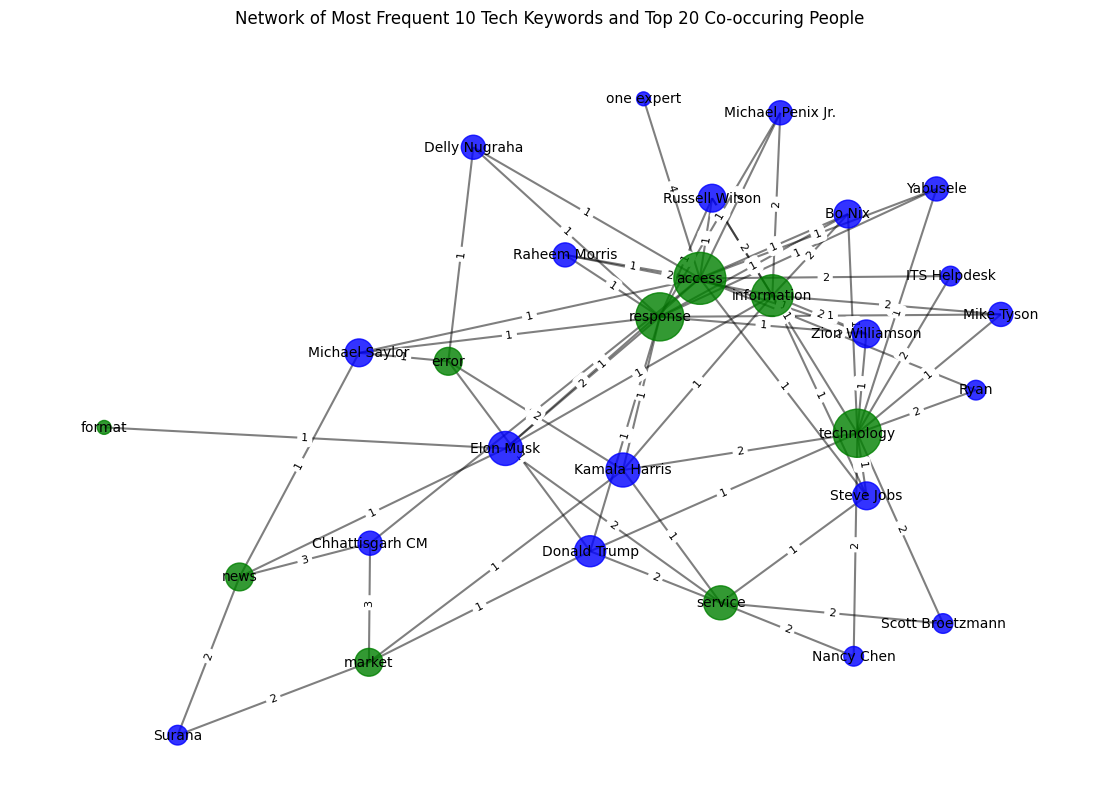

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

def visualize_co_occurrence_network(df):
    """
    Visualizes the co-occurrence between people and tech keywords using a network graph.

    Parameters:
    - df: A DataFrame with columns ['keyword', 'person', 'co_occurrence_count']
    """
    # Step 1: Create a NetworkX graph
    G = nx.Graph()

    # Step 2: Add nodes and edges based on the DataFrame
    for _, row in df.iterrows():
        person = row['person']
        keyword = row['keyword']
        co_occurrence_count = row['co_occurrence_count']

        # Add nodes for the person and keyword
        G.add_node(person, type='person', color='blue')
        G.add_node(keyword, type='keyword', color='green')

        # Add an edge with the co-occurrence count as weight
        G.add_edge(person, keyword, weight=co_occurrence_count)

    # Step 3: Set node colors based on their type
    colors = [G.nodes[node]['color'] for node in G.nodes]
    sizes = [G.degree(node) * 100 for node in G.nodes]  # Scale node sizes by degree

    # Step 4: Generate positions using spring layout
    pos = nx.spring_layout(G, seed=42, k=0.5)

    # Step 5: Draw the network graph
    plt.figure(figsize=(14, 10))
    nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=sizes, alpha=0.8)
    nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=10)

    # Draw edge labels (co-occurrence counts)
    edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

    plt.title("Network of Most Frequent 10 Tech Keywords and Top 20 Co-occuring People ")
    plt.axis('off')
    plt.show()


visualize_co_occurrence_network(top_people_with_keywords_df)


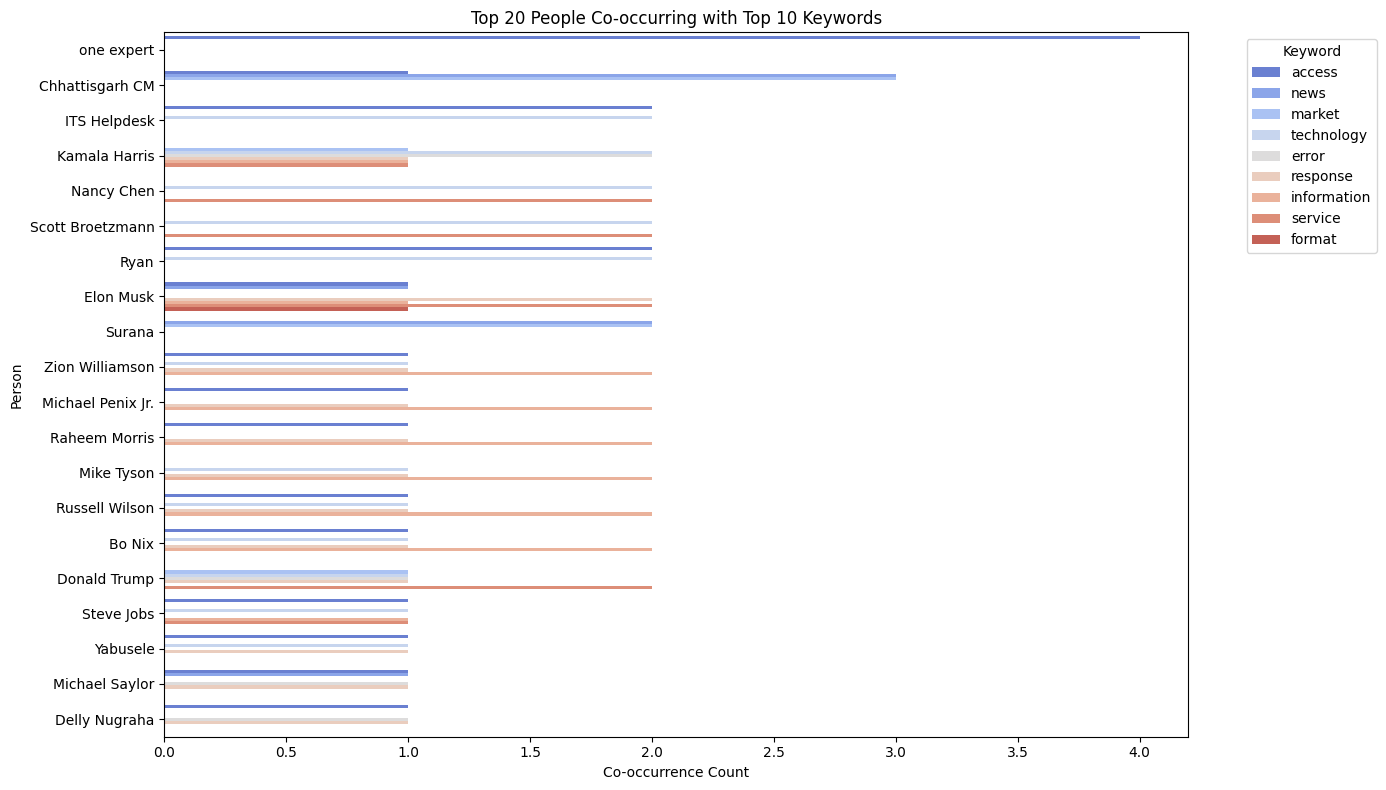

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_people_keywords_co_occurrence(df):
    """
    Plots a bar graph of the top people and the keywords they co-occur with.

    Parameters:
    - df: DataFrame containing columns ['person', 'keyword', 'co_occurrence_count']
    """
    plt.figure(figsize=(14, 8))
    sns.barplot(
        x='co_occurrence_count',
        y='person',
        hue='keyword',
        data=df,
        palette='coolwarm'
    )

    plt.title('Top 20 People Co-occurring with Top 10 Keywords')
    plt.xlabel('Co-occurrence Count')
    plt.ylabel('Person')
    plt.legend(title='Keyword', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Usage
plot_people_keywords_co_occurrence(top_people_with_keywords_df)


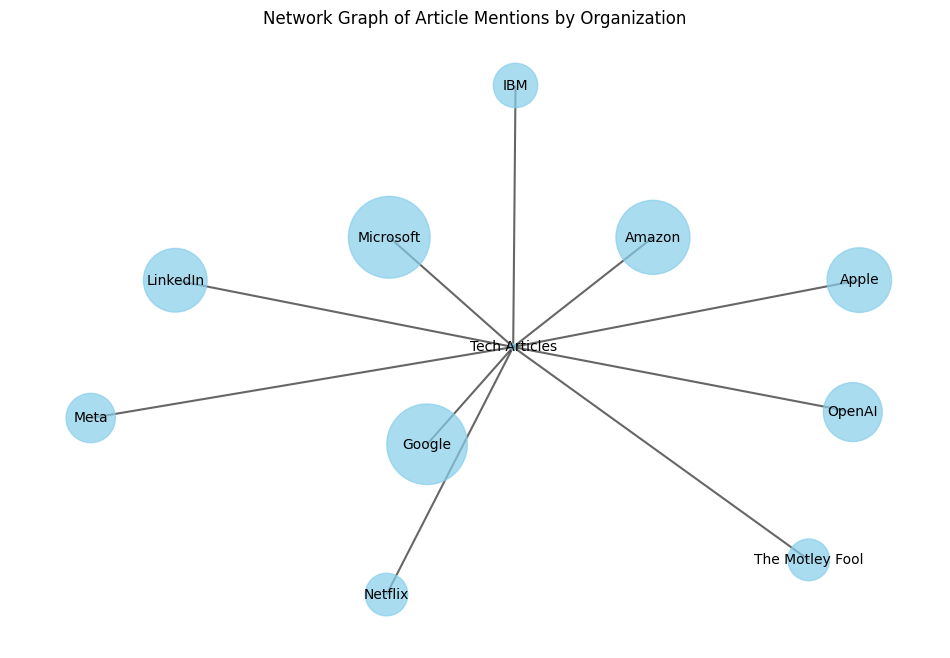

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_mentions_network():
    # Generate the data using the function
    article_mentions_df = get_article_mentions_by_organization()

    # Create a NetworkX graph
    G = nx.Graph()

    # Add nodes and edges to the graph with proper size attributes
    for _, row in article_mentions_df.iterrows():
        organization = row['organization']
        mention_count = row['mention_count']

        # Add the node with size attribute
        G.add_node(organization)
        G.nodes[organization]['size'] = mention_count

        # Connect the organization to a central node "Tech Articles"
        G.add_edge("Tech Articles", organization, weight=mention_count)

    # Plot the network graph
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, seed=42)

    # Use default size if attribute is missing
    sizes = [G.nodes[node].get('size', 1) * 20 for node in G.nodes]

    nx.draw_networkx_nodes(G, pos, node_size=sizes, node_color='skyblue', alpha=0.7)
    nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.6)
    nx.draw_networkx_labels(G, pos, font_size=10)

    plt.title('Network Graph of Article Mentions by Organization')
    plt.axis('off')
    plt.show()

# Call the function to visualize
visualize_mentions_network()


In [ ]:
import pandas as pd
from neo4j import GraphDatabase

def get_top_organizations_by_mentions(limit=10):
    """
    Fetches the top N most mentioned organizations.
    """
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[:MENTIONS]->(o:Organization)
            RETURN o.name AS organization, COUNT(a) AS mention_count
            ORDER BY mention_count DESC
            LIMIT $limit
            """,
            parameters={"limit": limit}
        )

        data = [{"organization": record["organization"], "mention_count": record["mention_count"]} for record in result]
        df = pd.DataFrame(data)
        return df

def get_sentiment_for_top_organizations(organizations):
    """
    Fetches the average sentiment for a given list of organizations.
    """
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[:MENTIONS]->(o:Organization)
            WHERE o.name IN $organizations AND a.sentiment IS NOT NULL AND toFloat(a.sentiment) IS NOT NULL
            RETURN o.name AS organization, AVG(toFloat(a.sentiment)) AS avg_sentiment
            ORDER BY avg_sentiment DESC
            """,
            parameters={"organizations": organizations}
        )

        data = [{"organization": record["organization"], "avg_sentiment": record["avg_sentiment"]} for record in result]
        df = pd.DataFrame(data)
        return df

# Step 1: Get the top 10 most mentioned organizations
top_organizations_df = get_top_organizations_by_mentions()
top_organizations_list = top_organizations_df['organization'].tolist()

# Step 2: Get the average sentiment for these top organizations
sentiment_by_organization_df = get_sentiment_for_top_organizations(top_organizations_list)

# Display the DataFrame
display(sentiment_by_organization_df)


organization  avg_sentiment
0  The Motley Fool       0.581111
1         LinkedIn       0.454762
2        Microsoft       0.392197
3              IBM       0.375490
4           Google       0.375298
5           OpenAI       0.370556
6           Amazon       0.342958
7            Apple       0.325000
8          Netflix       0.206522
9             Meta       0.167460

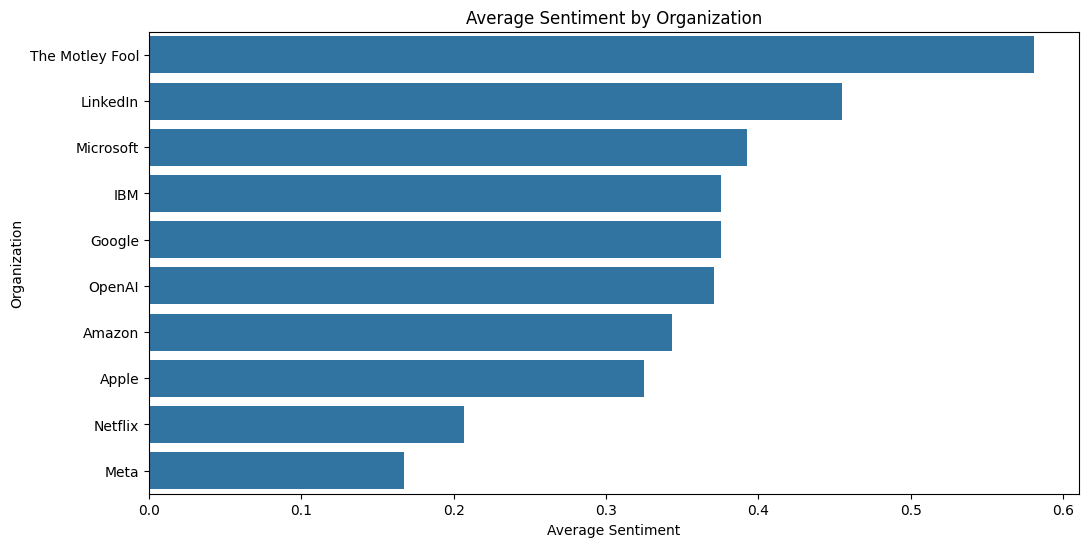

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_sentiment_by_organization(df):
    """
    Plots the average sentiment for each organization using a bar chart.
    """
    plt.figure(figsize=(12, 6))
    sns.barplot(x='avg_sentiment', y='organization', data=df)
    plt.title('Average Sentiment by Organization')
    plt.xlabel('Average Sentiment')
    plt.ylabel('Organization')
    plt.show()

# Visualize the results
plot_sentiment_by_organization(sentiment_by_organization_df)


In [ ]:

def get_top_articles_by_sentiment(organizations):
    """
    Fetches the top 3 articles with the highest absolute sentiment for each organization.
    """
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[:MENTIONS]->(o:Organization)
            WHERE o.name IN $organizations AND a.sentiment IS NOT NULL AND toFloat(a.sentiment) IS NOT NULL
            WITH o.name AS organization, a.title AS article_title, a.sentiment AS sentiment, a.description AS article_description
            ORDER BY ABS(toFloat(sentiment)) DESC
            WITH organization, COLLECT({title: article_title, sentiment: sentiment, description: article_description}) AS articles
            UNWIND articles[0..3] AS top_article
            RETURN organization, top_article.title AS article_title, top_article.sentiment AS sentiment, top_article.description AS article_description
            ORDER BY organization, ABS(toFloat(sentiment)) DESC
            """,
            parameters={"organizations": organizations}
        )

        # Convert results to a DataFrame
        data = [
            {
                "organization": record["organization"],
                "article_title": record["article_title"],
                "sentiment": record["sentiment"],
                "article_description": record.get("article_description", "N/A")
            }
            for record in result
        ]
        df = pd.DataFrame(data)
        return df

influential_articles_df = get_top_articles_by_sentiment(top_organizations_list)
display(influential_articles_df)

organization                                      article_title  \
0            Amazon  Beyond ChatGPT: The Latest Breakthroughs in AI...   
1            Amazon  ‘Family tragedy’: 10-year-old Wisconsin boy ch...   
2            Amazon  10 best dorm essentials to make university lif...   
3             Apple       Apple launches Apple Store online in Vietnam   
4             Apple  Blockchain interoperability protocol LayerZero...   
5             Apple  Discord Twitter Reddit and Tumblr have somethi...   
6            Google  Beyond ChatGPT: The Latest Breakthroughs in AI...   
7            Google  Groove Ranks #1 in Enterprise Customer Satisfa...   
8            Google  BairesDev Named to Inc.’s 2022 Best in Busines...   
9               IBM  Customer Service Outsourcing Philippines: How ...   
10              IBM                  The Best Security Suites for 2023   
11              IBM        Claroty partnership con alcuni MSSP globali   
12         LinkedIn  Solis Technology’s Cutting-edge Development Se...   
13         LinkedIn     Spring 2023 Internship @ Kaar Technologies Inc   
14         LinkedIn                          We Will Own The Internet!   
15             Meta  Salsa dips into $10M to fire up payroll featur...   
16             Meta  TIFIN's AMP Division Expands Its Data Science ...   
17             Meta  Twitter removes hateful conduct protections fo...   
18        Microsoft  Infosys Microsoft partner to accelerate adopti...   
19        Microsoft                  Best online form builders of 2023   
20        Microsoft  Trusting Social brings AI-powered agents to en...   
21          Netflix  Rob Lowe Says Being a Dad to Post-College Kids...   
22          Netflix  Amazon Prime Day slashes Ninja air fryer to £9...   
23          Netflix  Sony Bravia XR 4K X95L Mini LED TV Launched In...   
24           OpenAI  Beyond ChatGPT: The Latest Breakthroughs in AI...   
25           OpenAI  ‘An absolute godsend’: Three entrepreneurs rev...   
26           OpenAI  Be My Eyes meets GPT-4: Is AI the next frontie...   
27  The Motley Fool  History Suggests the Nasdaq-100 Will Soar for ...   
28  The Motley Fool  2 Market-Beating Growth Stocks to Buy Now and ...   
29  The Motley Fool  3 Magnificent Stocks With P/E Ratios Under 15 ...   

    sentiment article_description  
0        1.00                None  
1       -1.00                None  
2        0.85                None  
3        0.90                None  
4        0.85                None  
5       -0.85                None  
6        1.00                None  
7        0.95                None  
8        0.90                None  
9        0.95                None  
10       0.85                None  
11       0.85                None  
12       0.85                None  
13       0.85                None  
14       0.85                None  
15       0.85                None  
16       0.85                None  
17      -0.85                None  
18       0.90                None  
19       0.85                None  
20       0.85                None  
21       0.85                None  
22       0.85                None  
23       0.85                None  
24       1.00                None  
25       0.85                None  
26       0.85                None  
27       0.85                None  
28       0.85                None  
29       0.85                None

In [ ]:
def get_keywords_for_articles(article_titles):
    """
    Fetches common keywords for a list of article titles.
    """
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[:MENTIONS]->(k:Keyword)
            WHERE a.title IN $article_titles
            RETURN k.name AS keyword, COUNT(*) AS mention_count
            ORDER BY mention_count DESC
            LIMIT 10
            """,
            parameters={"article_titles": article_titles}
        )

        data = [{"keyword": record["keyword"], "mention_count": record["mention_count"]} for record in result]
        df = pd.DataFrame(data)
        return df

# Extract article titles
article_titles_list = influential_articles_df['article_title'].tolist()

# Get common keywords for the top influential articles
keywords_df = get_keywords_for_articles(article_titles_list)
display(keywords_df)


keyword  mention_count
0          advertise              1
1           violence              1
2         management              1
3            capital              1
4         operations              1
5       social media              1
6  security concerns              1
7          user base              1
8     profit margins              1
9        free speech              1

<ipython-input-24-315721c8056a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment', y='article_title', data=org_df, palette='coolwarm')


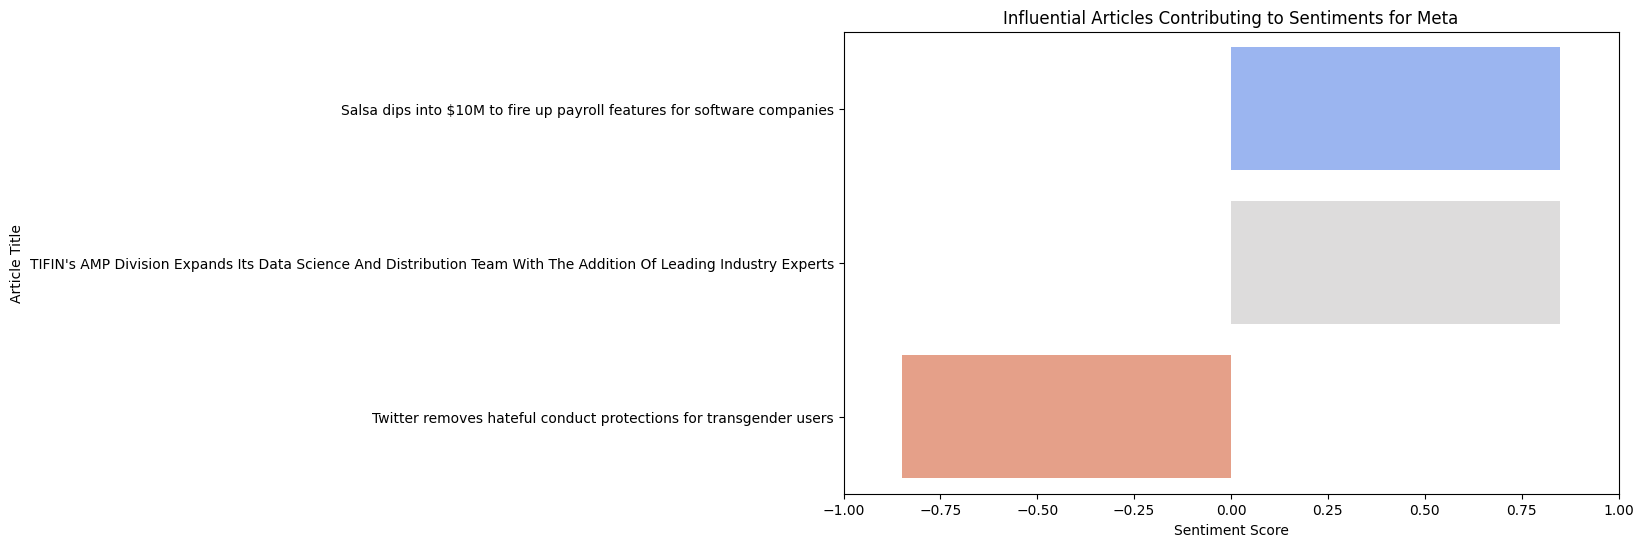

<ipython-input-24-315721c8056a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment', y='article_title', data=org_df, palette='coolwarm')


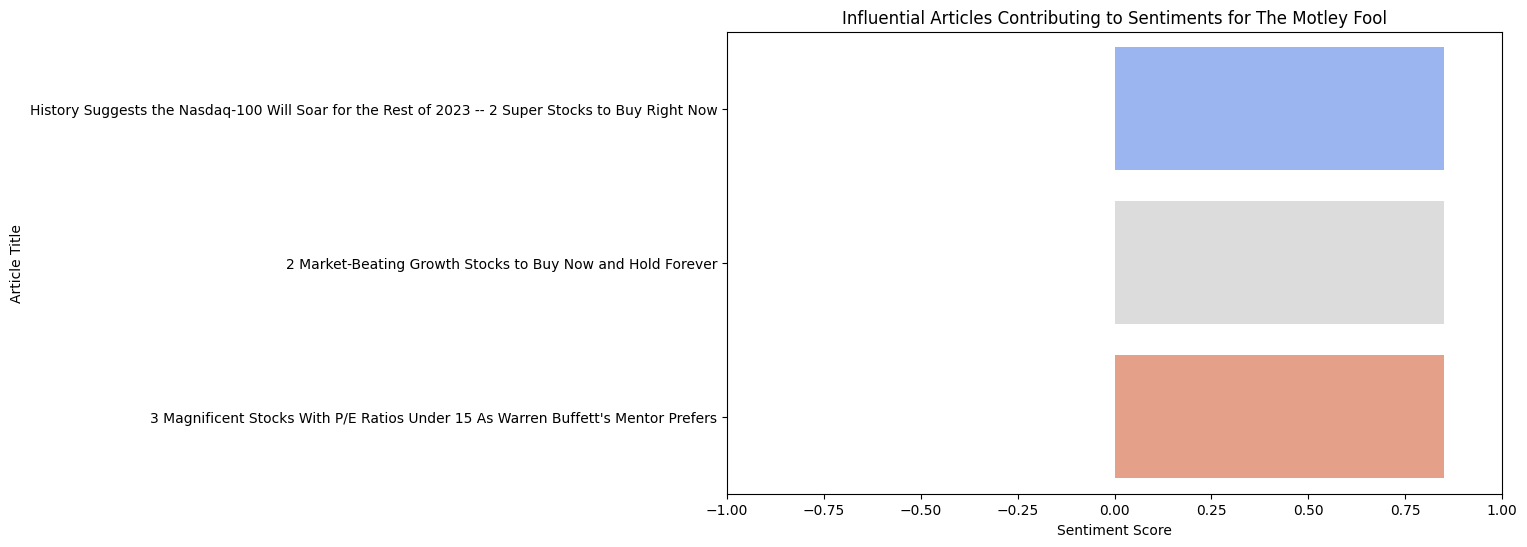

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_influential_articles(df, organization_name):
    """
    Plots influential articles for a given organization.
    """
    # Filter the DataFrame for the specified organization
    org_df = df[df['organization'] == organization_name]

    if org_df.empty:
        print(f"No data available for {organization_name}")
        return

    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x='sentiment', y='article_title', data=org_df, palette='coolwarm')
    plt.title(f'Influential Articles Contributing to Sentiments for {organization_name}')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Article Title')
    plt.xlim(-1, 1)  # Assuming sentiment scores range between -1 and 1
    plt.show()

# Visualize for Meta
plot_influential_articles(influential_articles_df, 'Meta')

# Visualize for Motley Fool
plot_influential_articles(influential_articles_df, 'The Motley Fool')


In [ ]:
def get_keywords_by_sentiment(organization, sentiment_threshold):
    """
    Fetches keywords associated with articles that have positive or negative sentiment for a given organization.
    """
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[:MENTIONS]->(o:Organization)
            MATCH (a)-[:MENTIONS]->(k:Keyword)
            WHERE o.name = $organization
              AND a.sentiment IS NOT NULL
              AND toFloat(a.sentiment) IS NOT NULL
              AND (CASE WHEN $sentiment_threshold > 0 THEN a.sentiment > 0 ELSE a.sentiment < 0 END)
            RETURN k.name AS keyword, COUNT(*) AS mention_count
            ORDER BY mention_count DESC
            LIMIT 10
            """,
            parameters={"organization": organization, "sentiment_threshold": sentiment_threshold}
        )

        data = [{"keyword": record["keyword"], "mention_count": record["mention_count"]} for record in result]
        return pd.DataFrame(data)


In [ ]:
def get_keywords_for_organizations(organizations):
    """
    Fetches positive and negative keywords for a list of organizations.
    """
    results = {}
    for org in organizations:
        print(f"\nProcessing {org}...")
        positive_keywords = get_keywords_by_sentiment(org, sentiment_threshold=1)
        negative_keywords = get_keywords_by_sentiment(org, sentiment_threshold=-1)

        results[org] = {
            "positive_keywords": positive_keywords,
            "negative_keywords": negative_keywords
        }

    return results

# Example Usage
keywords_results = get_keywords_for_organizations(top_organizations_list)

# Display the results for each organization
for org, data in keywords_results.items():
    print(f"\nPositive Keywords for {org}")
    display(data["positive_keywords"])

    print(f"Negative Keywords for {org}")
    display(data["negative_keywords"])



Processing Microsoft...

Processing Google...

Processing Amazon...

Processing Apple...

Processing LinkedIn...

Processing OpenAI...

Processing Meta...

Processing IBM...

Processing Netflix...

Processing The Motley Fool...

Positive Keywords for Microsoft


keyword  mention_count
0                 security              7
1                 software              7
2  artificial intelligence              6
3                   stocks              6
4             productivity              5
5              performance              5
6               experience              5
7                 research              5
8                   demand              4
9                   market              4

Negative Keywords for Microsoft


keyword  mention_count
0                access              5
1            technology              4
2               updates              3
3           regulations              3
4                  news              3
5       service outages              2
6                 staff              2
7                future              2
8  visitor's experience              2
9            disruption              2


Positive Keywords for Google


keyword  mention_count
0              performance              6
1                 features              5
2  artificial intelligence              4
3                discounts              3
4               navigation              3
5                  privacy              3
6                  content              3
7                   models              3
8                 security              3
9                  storage              3

Negative Keywords for Google


keyword  mention_count
0         HTTP              3
1       access              3
2      service              3
3     response              3
4      updates              3
5      request              3
6  regulations              3
7  information              3
8     software              2
9     features              2


Positive Keywords for Amazon


keyword  mention_count
0       price              4
1     content              4
2      stocks              4
3   discounts              3
4    training              3
5  technology              3
6      models              3
7      gaming              3
8      growth              3
9    research              3

Negative Keywords for Amazon


keyword  mention_count
0    competition              4
1       security              3
2        defense              3
3      copyright              3
4  profitability              2
5         secure              2
6           risk              2
7           cost              2
8     technology              2
9          fight              2


Positive Keywords for Apple


keyword  mention_count
0        internet              3
1          stocks              3
2       streaming              3
3         content              3
4     performance              3
5           users              3
6       interface              3
7          models              3
8        software              3
9  user interface              2

Negative Keywords for Apple


keyword  mention_count
0      vulnerability              3
1      notifications              2
2            content              2
3             breach              2
4        performance              2
5             access              2
6  national security              2
7            website              2
8           security              2
9        credentials              2


Positive Keywords for LinkedIn


keyword  mention_count
0  Privacy Policy             14
1   Cookie Policy             13
2      management             13
3  User Agreement             13
4         account             11
5        research             11
6   communication              8
7      innovation              7
8    applications              7
9        insights              6

Negative Keywords for LinkedIn


keyword  mention_count
0        property              1
1      technology              1
2      innovation              1
3         culture              1
4         funding              1
5     agriculture              1
6        research              1
7      governance              1
8  climate change              1
9     development              1


Positive Keywords for OpenAI


keyword  mention_count
0  artificial intelligence              5
1               innovation              3
2                   growth              3
3             productivity              3
4                     bias              3
5       financial services              3
6                 software              2
7         machine learning              2
8                solutions              2
9          data collection              2

Negative Keywords for OpenAI


keyword  mention_count
0        content              4
1         access              3
2     technology              3
3          media              3
4    partnership              2
5    information              2
6           news              2
7  collaboration              2
8        request              2
9          error              2


Positive Keywords for Meta


keyword  mention_count
0      privacy              2
1      content              2
2   commission              2
3     security              2
4        users              2
5   technology              2
6   experience              2
7      testing              2
8     audience              1
9  performance              1

Negative Keywords for Meta


keyword  mention_count
0     content              2
1      breach              2
2    children              2
3     history              1
4    features              1
5     privacy              1
6    security              1
7     account              1
8  monitoring              1
9  censorship              1


Positive Keywords for IBM


keyword  mention_count
0             productivity              2
1                   growth              2
2  artificial intelligence              2
3               automation              2
4                 analysis              2
5                   market              2
6            collaboration              2
7                    price              1
8                   trends              1
9                 research              1

Negative Keywords for IBM


keyword  mention_count
0         HTTP              4
1     acquires              3
2      history              3
3  partnership              3
4      expands              3
5      service              3
6     software              3
7   government              3
8       market              3
9      company              3


Positive Keywords for Netflix


keyword  mention_count
0         streaming              3
1            system              2
2            design              2
3            models              1
4           fantasy              1
5     wide receiver              1
6        retirement              1
7           quality              1
8           content              1
9  Personal Finance              1

Negative Keywords for Netflix


keyword  mention_count
0         investors              3
1          business              2
2         streaming              2
3       regulations              2
4     vulnerability              2
5  Personal Finance              1
6          patients              1
7           arrests              1
8           lawsuit              1
9         emergency              1


Positive Keywords for The Motley Fool


keyword  mention_count
0          recommendations              2
1  artificial intelligence              2
2                 podcasts              2
3          market analysis              2
4                    speed              1
5                   report              1
6             compensation              1
7                 accuracy              1
8                affiliate              1
9                advertise              1

Negative Keywords for The Motley Fool


Empty DataFrame
Columns: []
Index: []

In [ ]:
import pandas as pd
from neo4j import GraphDatabase

def fetch_keywords_for_organization(organization):
    """
    Fetches positive and negative keywords associated with articles mentioning the given organization.
    """
    with driver.session() as session:
        # Fetch positive keywords
        positive_result = session.run(
            """
            MATCH (a:Article)-[:MENTIONS]->(o:Organization)
            MATCH (a)-[:MENTIONS]->(k:Keyword)
            WHERE o.name = $organization AND a.sentiment > 0
            RETURN k.name AS keyword, COUNT(*) AS mention_count
            ORDER BY mention_count DESC
            LIMIT 10
            """,
            parameters={"organization": organization}
        )
        positive_keywords = [{"keyword": record["keyword"], "mention_count": record["mention_count"]} for record in positive_result]

        # Fetch negative keywords
        negative_result = session.run(
            """
            MATCH (a:Article)-[:MENTIONS]->(o:Organization)
            MATCH (a)-[:MENTIONS]->(k:Keyword)
            WHERE o.name = $organization AND a.sentiment < 0
            RETURN k.name AS keyword, COUNT(*) AS mention_count
            ORDER BY mention_count DESC
            LIMIT 10
            """,
            parameters={"organization": organization}
        )
        negative_keywords = [{"keyword": record["keyword"], "mention_count": record["mention_count"]} for record in negative_result]

    return positive_keywords, negative_keywords


positive 10 [{'keyword': 'privacy', 'mention_count': 2}, {'keyword': 'content', 'mention_count': 2}, {'keyword': 'commission', 'mention_count': 2}, {'keyword': 'security', 'mention_count': 2}, {'keyword': 'users', 'mention_count': 2}, {'keyword': 'technology', 'mention_count': 2}, {'keyword': 'experience', 'mention_count': 2}, {'keyword': 'testing', 'mention_count': 2}, {'keyword': 'audience', 'mention_count': 1}, {'keyword': 'performance', 'mention_count': 1}]
negative 10 [{'keyword': 'content', 'mention_count': 2}, {'keyword': 'breach', 'mention_count': 2}, {'keyword': 'children', 'mention_count': 2}, {'keyword': 'history', 'mention_count': 1}, {'keyword': 'features', 'mention_count': 1}, {'keyword': 'privacy', 'mention_count': 1}, {'keyword': 'security', 'mention_count': 1}, {'keyword': 'account', 'mention_count': 1}, {'keyword': 'monitoring', 'mention_count': 1}, {'keyword': 'censorship', 'mention_count': 1}]


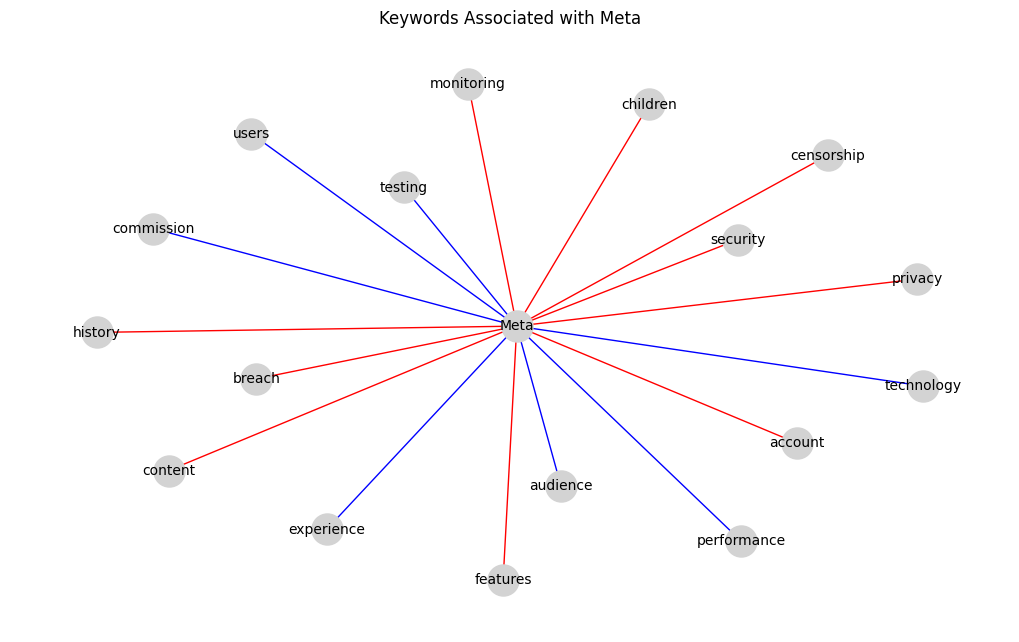

positive 10 [{'keyword': 'recommendations', 'mention_count': 2}, {'keyword': 'artificial intelligence', 'mention_count': 2}, {'keyword': 'podcasts', 'mention_count': 2}, {'keyword': 'market analysis', 'mention_count': 2}, {'keyword': 'speed', 'mention_count': 1}, {'keyword': 'report', 'mention_count': 1}, {'keyword': 'compensation', 'mention_count': 1}, {'keyword': 'accuracy', 'mention_count': 1}, {'keyword': 'affiliate', 'mention_count': 1}, {'keyword': 'advertise', 'mention_count': 1}]
negative 0 []


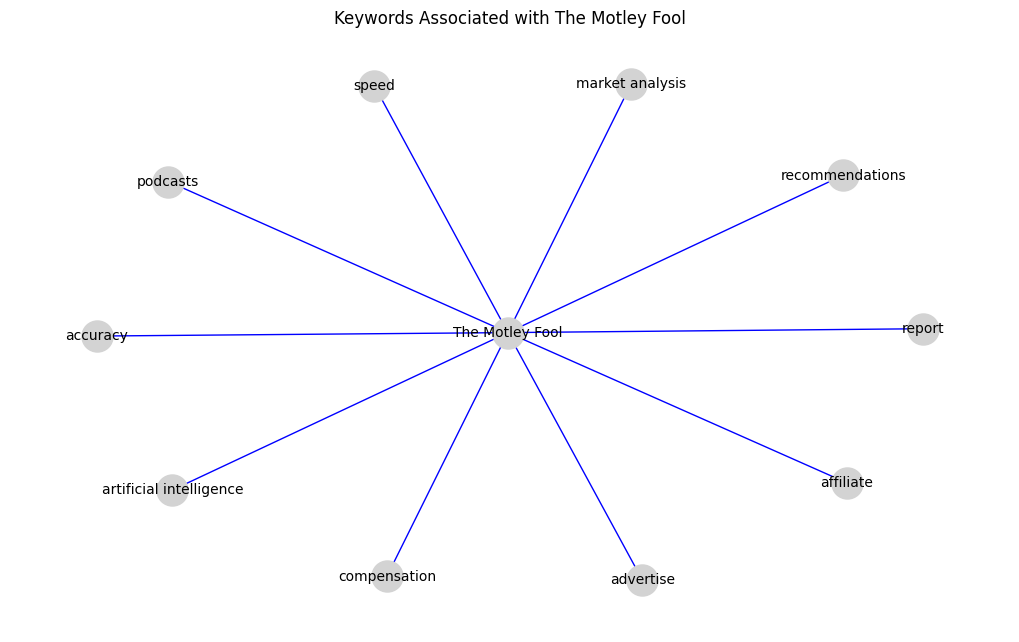

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_keywords_graph(organization, positive_keywords, negative_keywords):
    """
    Plots a network graph connecting an organization to its positive and negative keywords.
    """
    G = nx.Graph()

    # Add the organization as a node
    G.add_node(organization, type='organization')

    # Add positive keywords as nodes and connect with blue edges
    for keyword in positive_keywords:
        G.add_node(keyword["keyword"], type='keyword')
        G.add_edge(organization, keyword["keyword"], color='blue')

    # Add negative keywords as nodes and connect with red edges
    for keyword in negative_keywords:
        G.add_node(keyword["keyword"], type='keyword')
        G.add_edge(organization, keyword["keyword"], color='red')

    # Extract edge colors
    edges = G.edges(data=True)
    edge_colors = ['blue' if edge[2]['color'] == 'blue' else 'red' for edge in edges]

    # Plot the graph
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, edge_color=edge_colors, node_size=500, font_size=10, font_color='black', node_color='lightgray')
    plt.title(f"Keywords Associated with {organization}")
    plt.show()

new_list = ["Meta", "The Motley Fool"]
for organization in new_list:
    positive_keywords, negative_keywords = fetch_keywords_for_organization(organization)
    print("positive", len(positive_keywords), positive_keywords)
    print("negative", len(negative_keywords), negative_keywords)
    plot_keywords_graph(organization, positive_keywords, negative_keywords)


In [ ]:
import pandas as pd
from neo4j import GraphDatabase

def fetch_polarizing_keywords():
    """
    Fetches the top 5 most positive and top 5 most negative keywords.
    """
    with driver.session() as session:
        # Fetch top 10 positive keywords
        positive_result = session.run(
            """
            MATCH (a:Article)-[:MENTIONS]->(k:Keyword)
            WHERE a.sentiment IS NOT NULL AND toFloat(a.sentiment) > 0
            RETURN k.name AS keyword, AVG(toFloat(a.sentiment)) AS avg_sentiment, COUNT(*) AS mention_count
            ORDER BY avg_sentiment DESC
            LIMIT 5
            """
        )
        positive_keywords = [{"keyword": record["keyword"], "avg_sentiment": record["avg_sentiment"]} for record in positive_result]

        # Fetch top 10 negative keywords
        negative_result = session.run(
            """
            MATCH (a:Article)-[:MENTIONS]->(k:Keyword)
            WHERE a.sentiment IS NOT NULL AND toFloat(a.sentiment) < 0
            RETURN k.name AS keyword, AVG(toFloat(a.sentiment)) AS avg_sentiment, COUNT(*) AS mention_count
            ORDER BY avg_sentiment ASC
            LIMIT 5
            """
        )
        negative_keywords = [{"keyword": record["keyword"], "avg_sentiment": record["avg_sentiment"]} for record in negative_result]

    return positive_keywords, negative_keywords

def fetch_keywords_for_organizations(organizations):
    """
    Fetches positive and negative keywords associated with the top 10 organizations.
    """
    org_keywords = {}
    with driver.session() as session:
        for org in organizations:
            # Fetch positive keywords
            positive_result = session.run(
                """
                MATCH (a:Article)-[:MENTIONS]->(o:Organization)
                MATCH (a)-[:MENTIONS]->(k:Keyword)
                WHERE o.name = $organization AND a.sentiment > 0
                RETURN k.name AS keyword, AVG(toFloat(a.sentiment)) AS avg_sentiment
                ORDER BY avg_sentiment DESC
                LIMIT 3
                """,
                parameters={"organization": org}
            )
            positive_keywords = [{"keyword": record["keyword"], "avg_sentiment": record["avg_sentiment"]} for record in positive_result]

            # Fetch negative keywords
            negative_result = session.run(
                """
                MATCH (a:Article)-[:MENTIONS]->(o:Organization)
                MATCH (a)-[:MENTIONS]->(k:Keyword)
                WHERE o.name = $organization AND a.sentiment < 0
                RETURN k.name AS keyword, AVG(toFloat(a.sentiment)) AS avg_sentiment
                ORDER BY avg_sentiment ASC
                LIMIT 3
                """,
                parameters={"organization": org}
            )
            negative_keywords = [{"keyword": record["keyword"], "avg_sentiment": record["avg_sentiment"]} for record in negative_result]

            org_keywords[org] = {
                "positive": positive_keywords,
                "negative": negative_keywords
            }

    return org_keywords


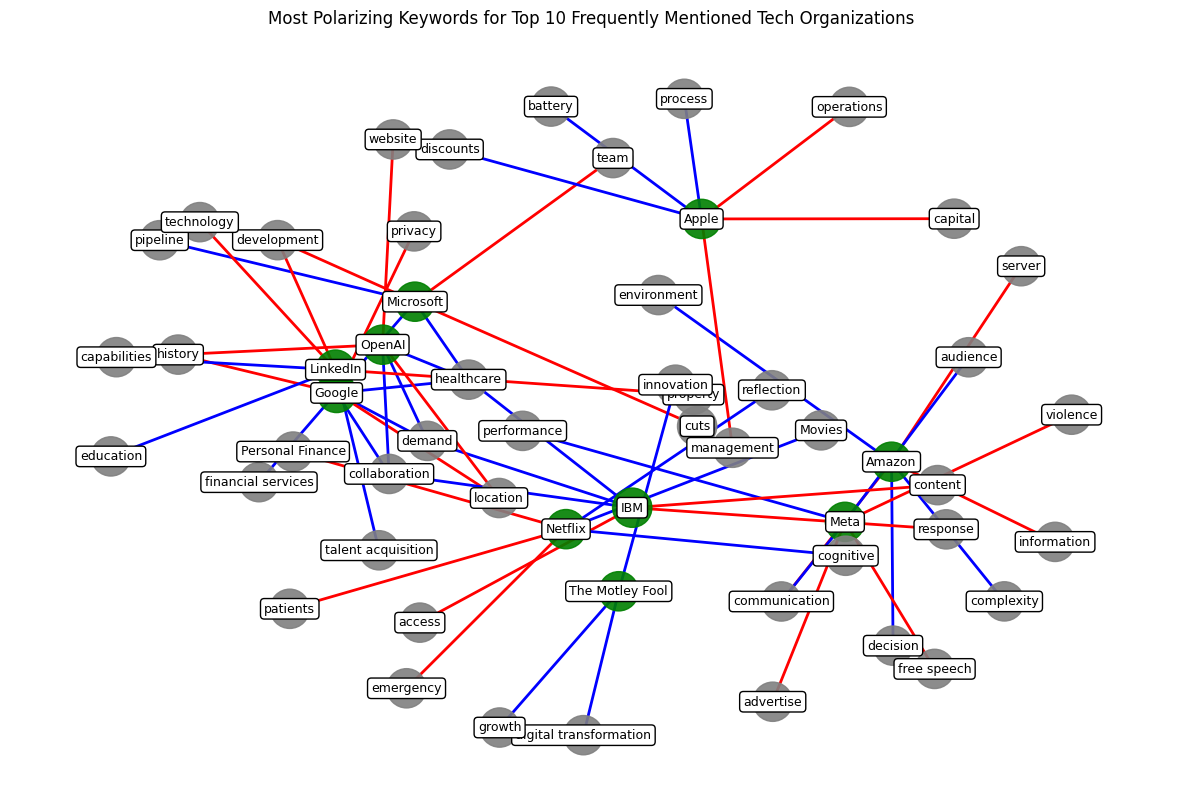

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_comprehensive_graph(org_keywords):
    G = nx.Graph()

    for org, data in org_keywords.items():
        G.add_node(org, type='organization')

        # Positive keywords for the organization
        for keyword in data["positive"]:
            G.add_node(keyword["keyword"], sentiment='positive', type='keyword')
            G.add_edge(org, keyword["keyword"], color='blue')

        # Negative keywords for the organization
        for keyword in data["negative"]:
            G.add_node(keyword["keyword"], sentiment='negative', type='keyword')
            G.add_edge(org, keyword["keyword"], color='red')

    # Extract edge colors
    edges = G.edges(data=True)
    edge_colors = ['blue' if edge[2]['color'] == 'blue' else 'red' for edge in edges]

    # Generate node colors based on node type
    node_colors = []
    for node in G.nodes(data=True):
        if node[1].get('type') == 'organization':
            node_colors.append('green')  # Color for organization nodes
        elif node[1].get('type') == 'keyword':
            node_colors.append('gray')   # Color for keyword nodes
        elif node[0] == "Positive":
            node_colors.append('lightblue')  # Color for positive sentiment node
        elif node[0] == "Negative":
            node_colors.append('red')        # Color for negative sentiment node
        else:
            node_colors.append('lightgray')  # Default color

    # Adjust the layout to spread out the nodes
    plt.figure(figsize=(15, 10))
    pos = nx.spring_layout(G, seed=42, k=2, iterations=200, scale=2)

    # Draw nodes and edges with different colors
    nx.draw_networkx_nodes(G, pos, node_size=800, alpha=0.9, node_color=node_colors)
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=2)

    # Draw labels with bounding boxes to avoid overlap
    labels = {node: node for node in G.nodes}
    nx.draw_networkx_labels(G, pos, labels, font_size=9, font_family="sans-serif",
                            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    plt.title("Most Polarizing Keywords for Top 10 Frequently Mentioned Tech Organizations")
    plt.axis('off')  # Turn off axis
    plt.show()

# Fetch data
org_keywords = fetch_keywords_for_organizations(top_organizations_list)

# Plot the comprehensive graph
plot_comprehensive_graph(org_keywords)


In [ ]:
def get_topic_co_occurrence():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[:HAS_TOPIC]->(t1:Topic), (a)-[:HAS_TOPIC]->(t2:Topic)
            WHERE t1 <> t2
            RETURN t1.name AS Topic1, t2.name AS Topic2, COUNT(a) AS co_occurrence_count
            ORDER BY co_occurrence_count DESC
            LIMIT 15
            """
        )

        data = [{"Topic1": record["Topic1"], "Topic2": record["Topic2"], "co_occurrence_count": record["co_occurrence_count"]} for record in result]
        df = pd.DataFrame(data)
        return df

# Usage
topic_co_occurrence_df = get_topic_co_occurrence()
display(topic_co_occurrence_df)


Topic1                          Topic2  \
0  Fintech and Financial Services           Healthcare Technology   
1           Healthcare Technology  Fintech and Financial Services   

   co_occurrence_count  
0                    1  
1                    1

In [ ]:
def get_publication_trends_by_topic():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[:HAS_TOPIC]->(t:Topic)
            WHERE a.publication_date IS NOT NULL
            WITH t.name AS topic, date(a.publication_date) AS pub_date, a
            RETURN topic, date.truncate('month', pub_date) AS month_year, COUNT(a) AS article_count
            ORDER BY month_year
            """
        )

        # Convert the results to a DataFrame
        data = [{"topic": record["topic"],
                 "month_year": record["month_year"],
                 "article_count": record["article_count"]} for record in result]
        df = pd.DataFrame(data)
        return df

# Usage
publication_trends_df = get_publication_trends_by_topic()
display(publication_trends_df)


topic  month_year  article_count
0                Artificial Intelligence  2014-03-01              1
1                   Virtual Reality (VR)  2019-03-01              1
2             Market Trends and Analysis  2019-03-01              1
3    Green Technology and Sustainability  2020-07-01              1
4                        Cloud Computing  2020-08-01              1
..                                   ...         ...            ...
551              Software Testing and QA  2023-10-01              1
552           Business Intelligence (BI)  2023-10-01              1
553             Data Integration and ETL  2023-10-01              1
554              Artificial Intelligence  2023-11-01              1
555               Social Media Platforms  2023-11-01              1

[556 rows x 3 columns]

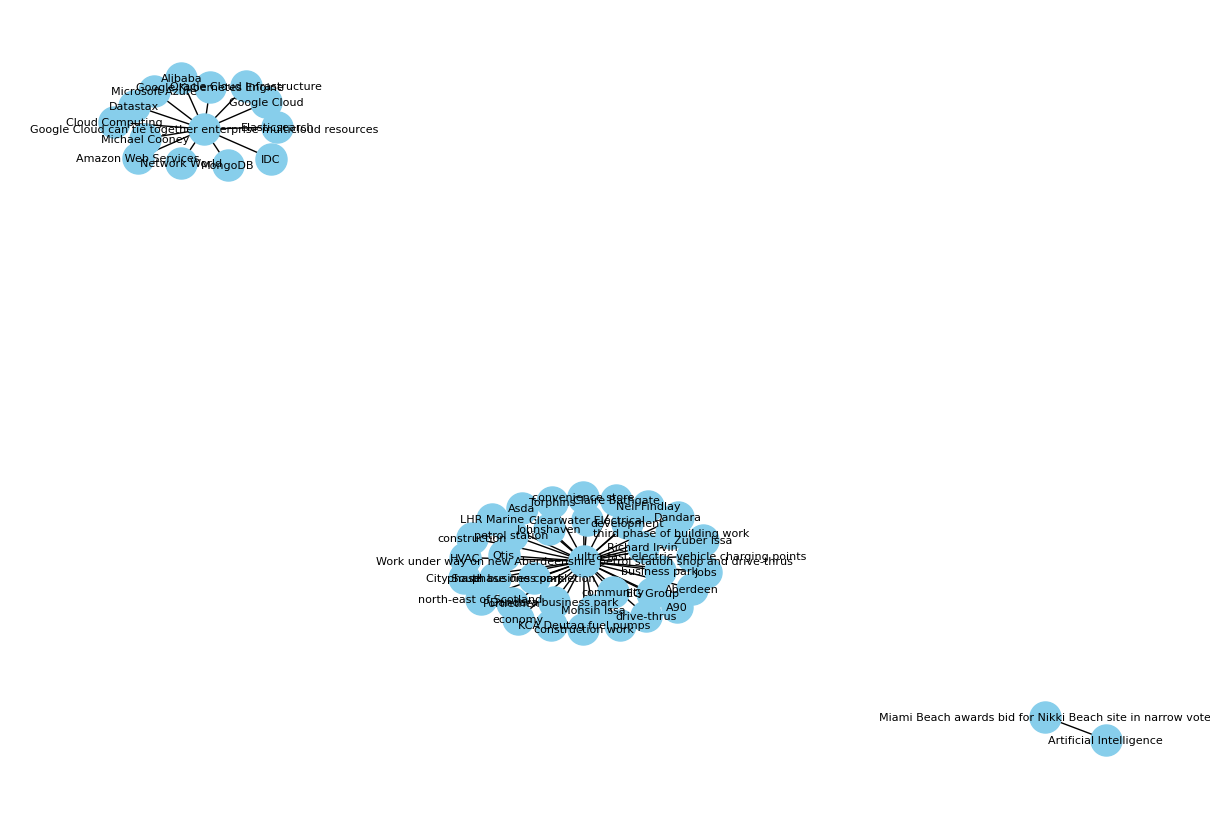

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph():
    G = nx.Graph()
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[r]->(b)
            RETURN a.title AS article, labels(b)[0] AS label, b.name AS name
            LIMIT 50
            """
        )
        for record in result:
            G.add_edge(record["article"], record["name"], label=record["label"])

    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=8)
    plt.show()

visualize_graph()


In [ ]:
import pandas as pd
from neo4j import GraphDatabase

def get_top_keywords_per_month(limit=5):
    """
    Fetches the top N keywords for each month across all years.
    """
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[:MENTIONS]->(k:Keyword)
            WHERE a.publication_date IS NOT NULL
            WITH k.name AS keyword, date(a.publication_date).month AS month, COUNT(a) AS mention_count
            ORDER BY month, mention_count DESC
            WITH month, keyword, mention_count,
                 ROW_NUMBER() OVER (PARTITION BY month ORDER BY mention_count DESC) AS rank
            WHERE rank <= $limit
            RETURN month, keyword, mention_count
            ORDER BY month, mention_count DESC
            """,
            parameters={"limit": limit}
        )

        # Convert the result to a DataFrame
        data = [{"month": record["month"], "keyword": record["keyword"], "mention_count": record["mention_count"]} for record in result]
        df = pd.DataFrame(data)

        # Convert month numbers to month names
        df['month'] = df['month'].apply(lambda x: pd.to_datetime(f'{x}', format='%m').strftime('%B'))
        return df

# Fetch the data with the top 5 keywords for each month
top_keywords_df = get_top_keywords_per_month(limit=5)


CypherSyntaxError: {code: Neo.ClientError.Statement.SyntaxError} {message: Invalid input 'OVER': expected an expression, 'FOREACH', ',', 'AS', 'ORDER BY', 'CALL', 'CREATE', 'LOAD CSV', 'DELETE', 'DETACH', 'FINISH', 'INSERT', 'LIMIT', 'MATCH', 'MERGE', 'NODETACH', 'OFFSET', 'OPTIONAL', 'REMOVE', 'RETURN', 'SET', 'SKIP', 'UNION', 'UNWIND', 'USE', 'WHERE', 'WITH' or <EOF> (line 7, column 31 (offset: 333))
"                 ROW_NUMBER() OVER (PARTITION BY month ORDER BY mention_count DESC) AS rank"
                               ^}

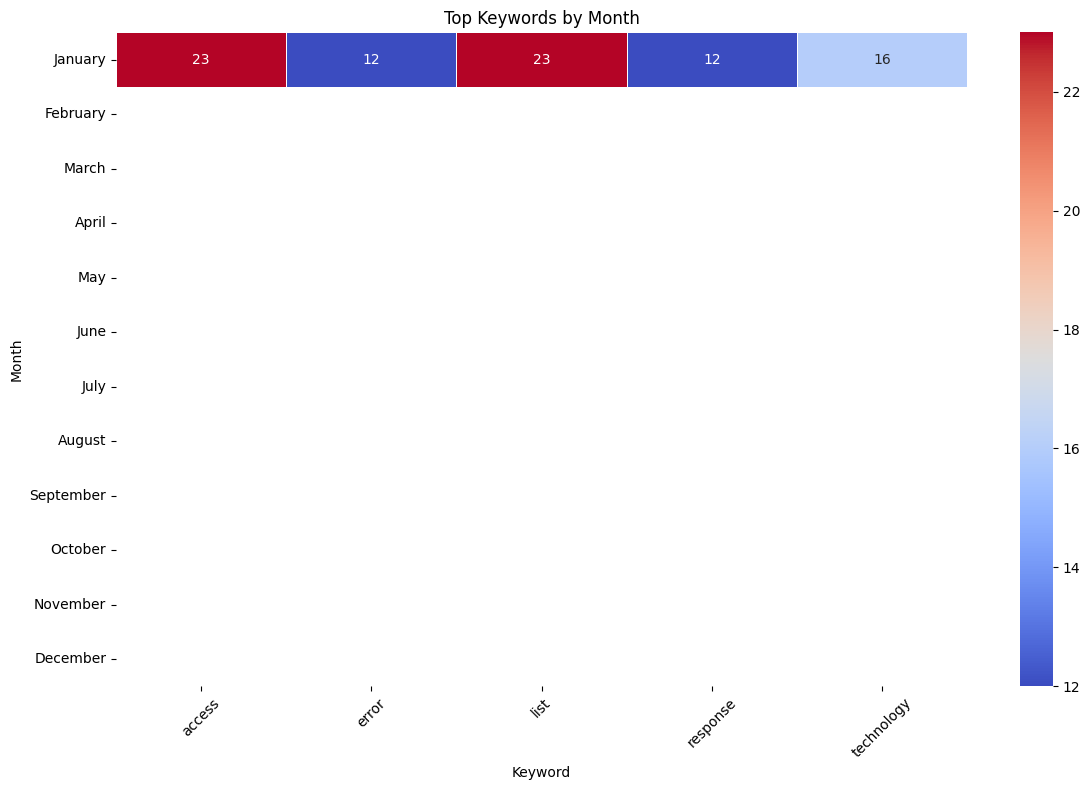

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_keywords_heatmap(df):
    """
    Plots a heatmap of the most common keywords by month.
    """
    # Create a pivot table with months as rows, keywords as columns, and mention counts as values
    pivot_df = df.pivot_table(index='month', columns='keyword', values='mention_count', fill_value=0)

    # Convert mention counts to integers (round first to avoid issues with floats)
    pivot_df = pivot_df.round(0).astype(int)

    # Sort the months in calendar order
    month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
    pivot_df = pivot_df.reindex(month_order)

    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_df, cmap='coolwarm', annot=True, linewidths=0.5)

    # Add labels and title
    plt.title('Top Keywords by Month')
    plt.xlabel('Keyword')
    plt.ylabel('Month')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot the heatmap
plot_keywords_heatmap(common_keywords_by_month_df)


In [ ]:


def get_company_mentions_by_month(limit=10):
    """
    Fetches the top N companies mentioned for each month across all years.
    """
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[:MENTIONS]->(c:Company)
            WHERE a.publication_date IS NOT NULL
            WITH c.name AS company, date(a.publication_date).month AS month, COUNT(a) AS mention_count
            ORDER BY month, mention_count DESC
            WITH month, company, mention_count,
                 ROW_NUMBER() OVER (PARTITION BY month ORDER BY mention_count DESC) AS rank
            WHERE rank <= $limit
            RETURN month, company, mention_count
            ORDER BY month, mention_count DESC
            """,
            parameters={"limit": limit}
        )

        # Convert the result to a DataFrame
        data = [{"month": record["month"], "company": record["company"], "mention_count": record["mention_count"]} for record in result]
        df = pd.DataFrame(data)

        # Convert month numbers to month names
        df['month'] = df['month'].apply(lambda x: pd.to_datetime(f'{x}', format='%m').strftime('%B'))
        return df




In [ ]:
def get_top_keyword_for_industry(industry_name):
    # Query the top keyword for a specific industry by name
    with driver.session() as session:
        print(f"Querying top keyword for industry: {industry_name}")
        result = session.run(
            """
            MATCH (a:Article)-[]->(k:Keyword)-[:BELONGS_TO_INDUSTRY]->(i:Industry {name: $industry_name})
            WITH k.name AS keyword, COUNT(*) AS keyword_count
            ORDER BY keyword_count DESC
            LIMIT 1
            RETURN keyword, keyword_count
            """,
            industry_name=industry_name
        )


        record = result.single()
        print(f"Result for {industry_name}: {record}")

        if record:
            return {
                "industry_name": industry_name,
                "top_keyword_name": record["keyword"],
                "top_keyword_count": record["keyword_count"]
            }

        print(f"No top keyword found for industry: {industry_name}")
        return None

def get_top_keywords_by_industry():

    industry_names = [
        "Communications and Media", "Software and Platforms", "High Tech", "Public Service",
        "Consumer Goods and Services", "Banking", "Health", "Capital Markets",
        "Retail", "US Federal Government"
    ]

    data = []


    for industry in industry_names:
        top_keyword = get_top_keyword_for_industry(industry)
        if top_keyword:
            data.append(top_keyword)

    df = pd.DataFrame(data)
    return df

top_keywords_by_industry_df = get_top_keywords_by_industry()
display(top_keywords_by_industry_df)




Querying top keyword for industry: Communications and Media
Result for Communications and Media: None
No top keyword found for industry: Communications and Media
Querying top keyword for industry: Software and Platforms
Result for Software and Platforms: None
No top keyword found for industry: Software and Platforms
Querying top keyword for industry: High Tech
Result for High Tech: <Record keyword='AI' keyword_count=39>
Querying top keyword for industry: Public Service
Result for Public Service: None
No top keyword found for industry: Public Service
Querying top keyword for industry: Consumer Goods and Services
Result for Consumer Goods and Services: None
No top keyword found for industry: Consumer Goods and Services
Querying top keyword for industry: Banking
Result for Banking: None
No top keyword found for industry: Banking
Querying top keyword for industry: Health
Result for Health: None
No top keyword found for industry: Health
Querying top keyword for industry: Capital Markets
Res

industry_name top_keyword_name  top_keyword_count
0     High Tech               AI                 39

In [ ]:
def get_organizations_associated_with_ai():
    """
    Fetches organizations that are mentioned in articles containing the keyword "AI".
    """
    with driver.session() as session:
        result = session.run(
            """
            MATCH (org:Organization)<-[:MENTIONS]-(article:Article)-[:MENTIONS]->(keyword:Keyword)
            WHERE keyword.name = "AI"
            RETURN DISTINCT org.name AS organization_name
            """
        )

        organizations = [record["organization_name"] for record in result]
        return organizations

organizations_with_ai = get_organizations_associated_with_ai()
print(organizations_with_ai)

['OpenAI', 'The Associated Press', 'Reddit', 'Twitter', 'Snopes Media Group Inc.', 'IBM', 'New Relic', 'AWS', 'CircleCI', 'Datadog, Inc.', 'Parasoft', 'Sonatype', 'Gravitee', 'Arm', 'SD Times', 'Google', 'LinkedIn', 'Quillbot', 'Originality', 'Content At Scale', 'Phrasly', 'Copyleaks', '3M', 'Medtronic', 'Abbott', 'Danaher', 'Johnson & Johnson', 'Lund University', 'Swedish Cancer Society', 'Confederation of Regional Cancer Centres', 'GE HealthCare', 'Baxter', 'Piedmont Reference Center for Epidemiology and Cancer Prevention', 'Synopsys', 'Seeking Alpha', 'TikTok', 'Watchful Technologies', 'Techweez', 'Palahala Media Group', 'Berkshire Hathaway', 'Greenlight Capital', 'Soros Fund Management', 'Renaissance Technologies', 'Omega Advisors', 'Icahn Capital LP', 'Point72 Asset Management', 'Paulson & Co', 'Appaloosa Management LP', 'Tudor Investment Corp', 'ServiceNow', 'WBR', 'destinationCRM.com', 'Information Today Inc.', 'CRM Magazine', 'CIO Applications', 'Staffbase', 'Apple', 'NASA', 'O

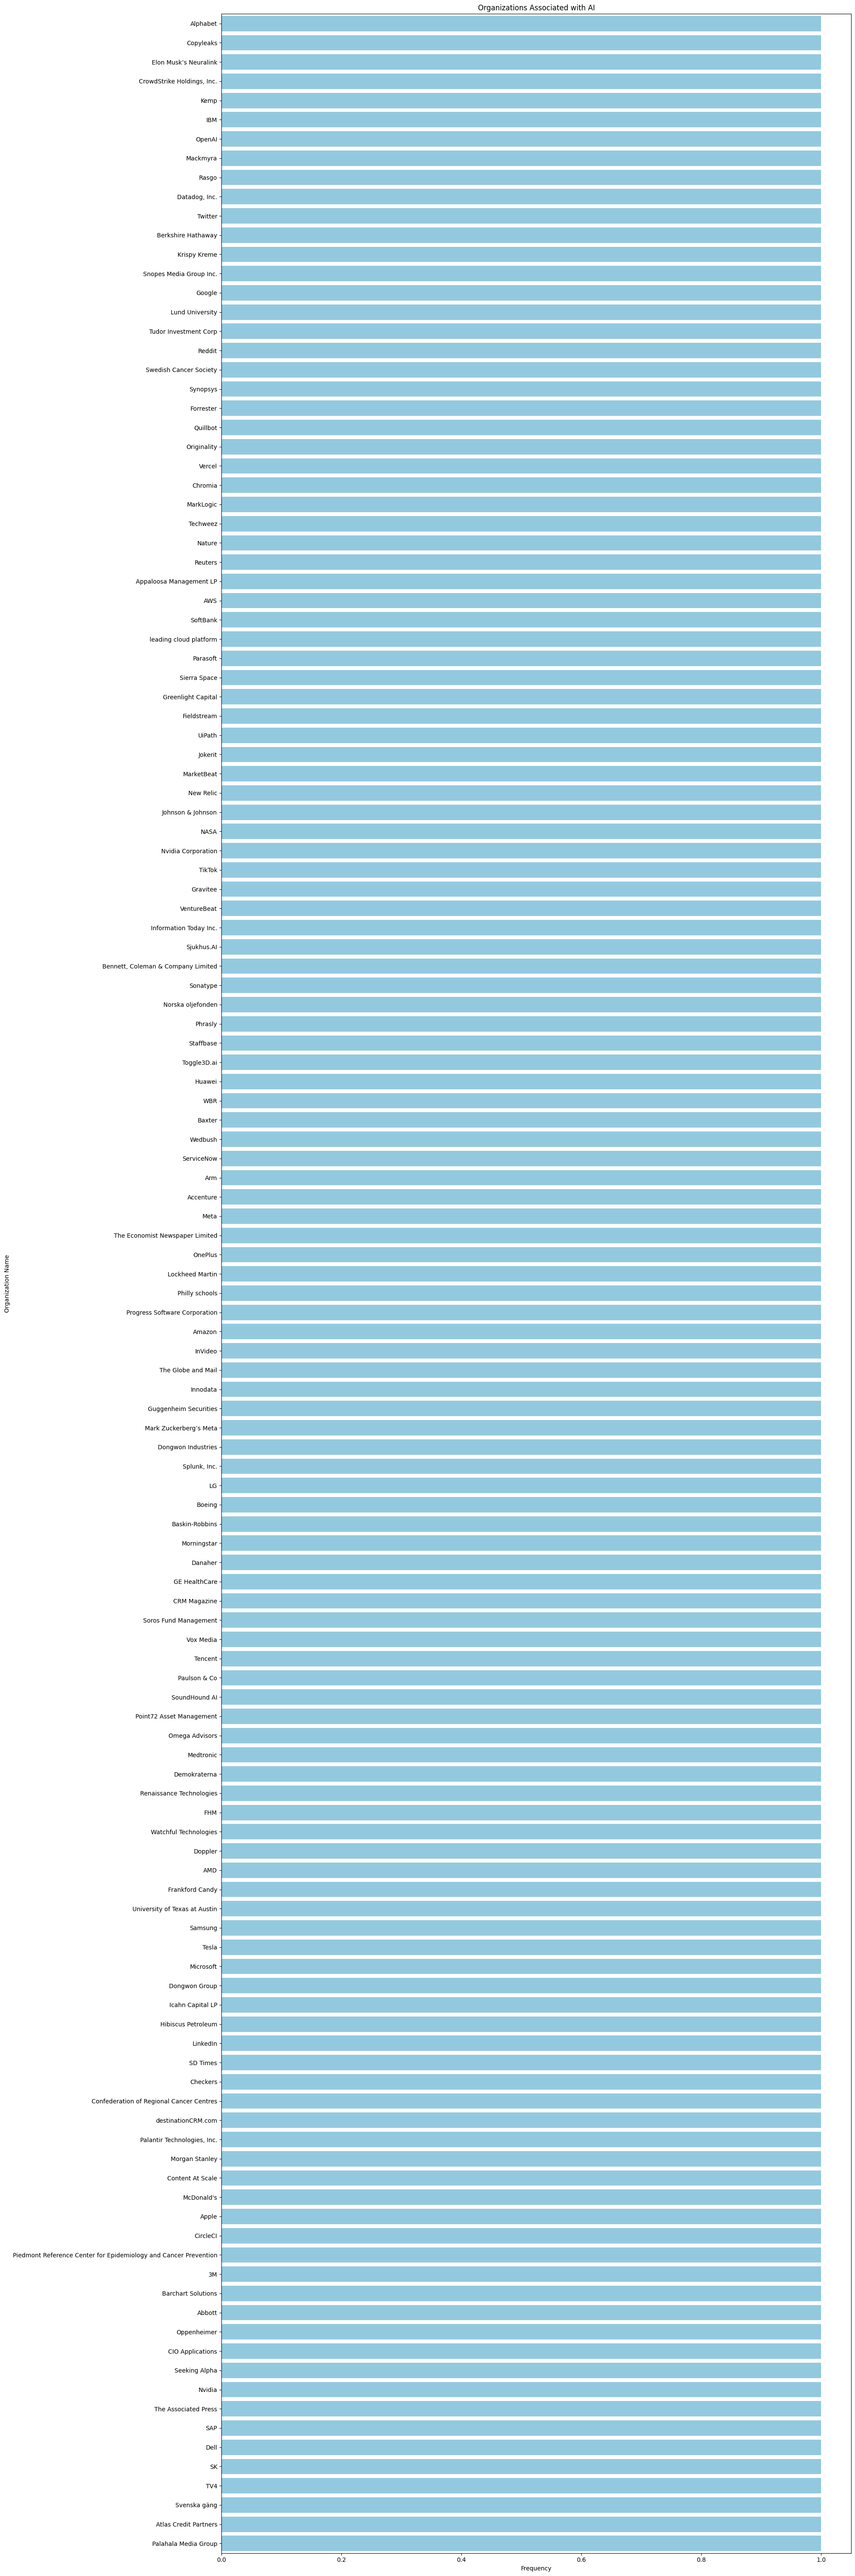

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_organizations_associated_with_ai():
    """
    Visualizes the organizations associated with the keyword "AI" using a bar chart.
    """
    organizations = get_organizations_associated_with_ai()


    org_counts = {org: organizations.count(org) for org in set(organizations)}


    sorted_orgs = sorted(org_counts.items(), key=lambda item: item[1], reverse=True)


    org_names, frequencies = zip(*sorted_orgs)

    plt.figure(figsize=(20, 60))
    sns.barplot(x=frequencies, y=org_names, orient="h", color="skyblue")
    plt.title("Organizations Associated with AI")
    plt.xlabel("Frequency")
    plt.ylabel("Organization Name")
    plt.tight_layout()
    plt.show()


visualize_organizations_associated_with_ai()

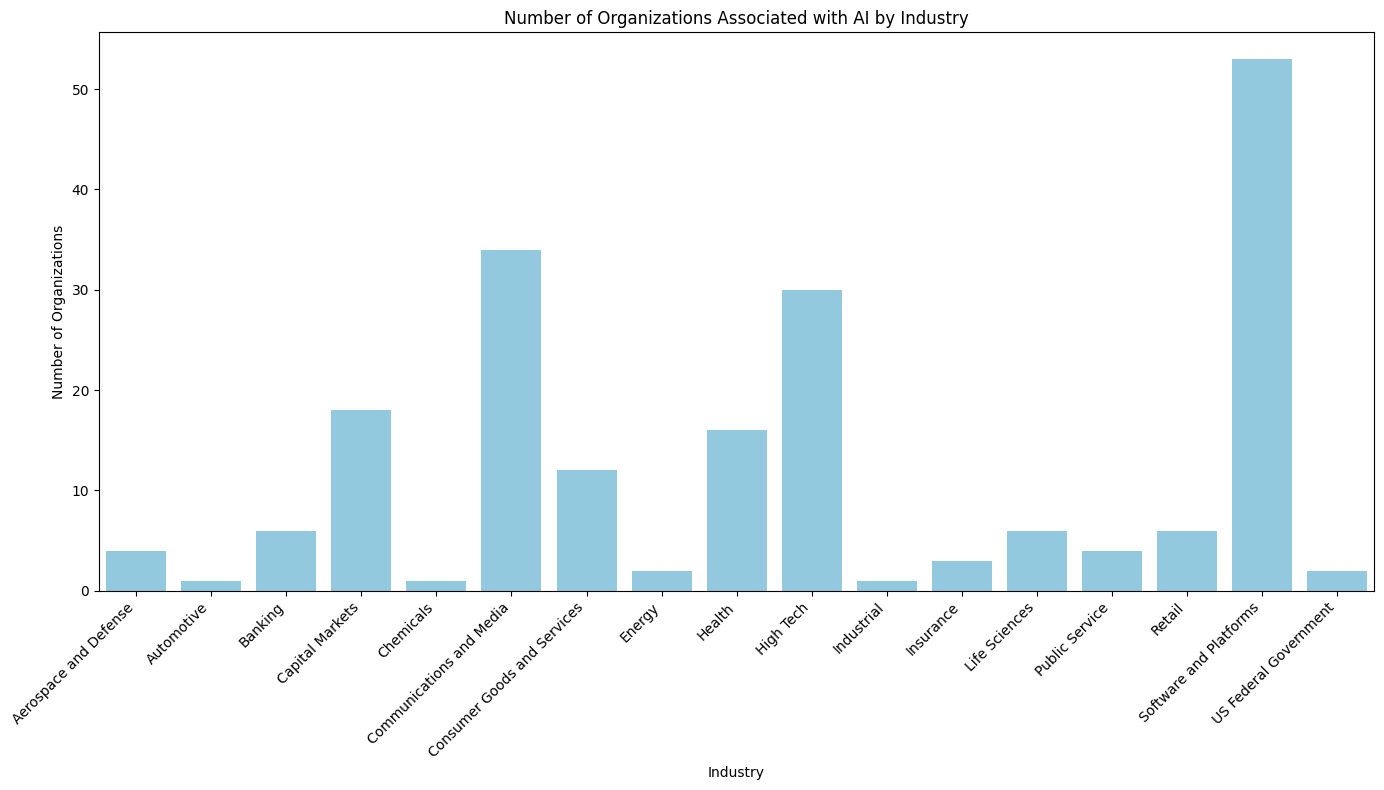

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def visualize_organizations_by_industry():
    """
    Visualizes organizations associated with AI, separated by industry, using a grouped bar chart.
    """
    with driver.session() as session:
        result = session.run(
            """
            MATCH (org:Organization)<-[:MENTIONS]-(article:Article)-[:MENTIONS]->(keyword:Keyword),
              (org)-[:BELONGS_TO_INDUSTRY]->(industry:Industry)
            WHERE keyword.name = "AI"
            RETURN DISTINCT org.name AS organization_name, industry.name AS industry_name
            """
        )
        data = [{"organization_name": record["organization_name"], "industry_name": record["industry_name"]} for record in result]
        df = pd.DataFrame(data)

    industry_org_counts = df.groupby('industry_name')['organization_name'].count().reset_index()


    plt.figure(figsize=(14, 8))
    sns.barplot(x='industry_name', y='organization_name', data=industry_org_counts, color="skyblue")
    plt.title("Number of Organizations Associated with AI by Industry")
    plt.xlabel("Industry")
    plt.ylabel("Number of Organizations")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

visualize_organizations_by_industry()

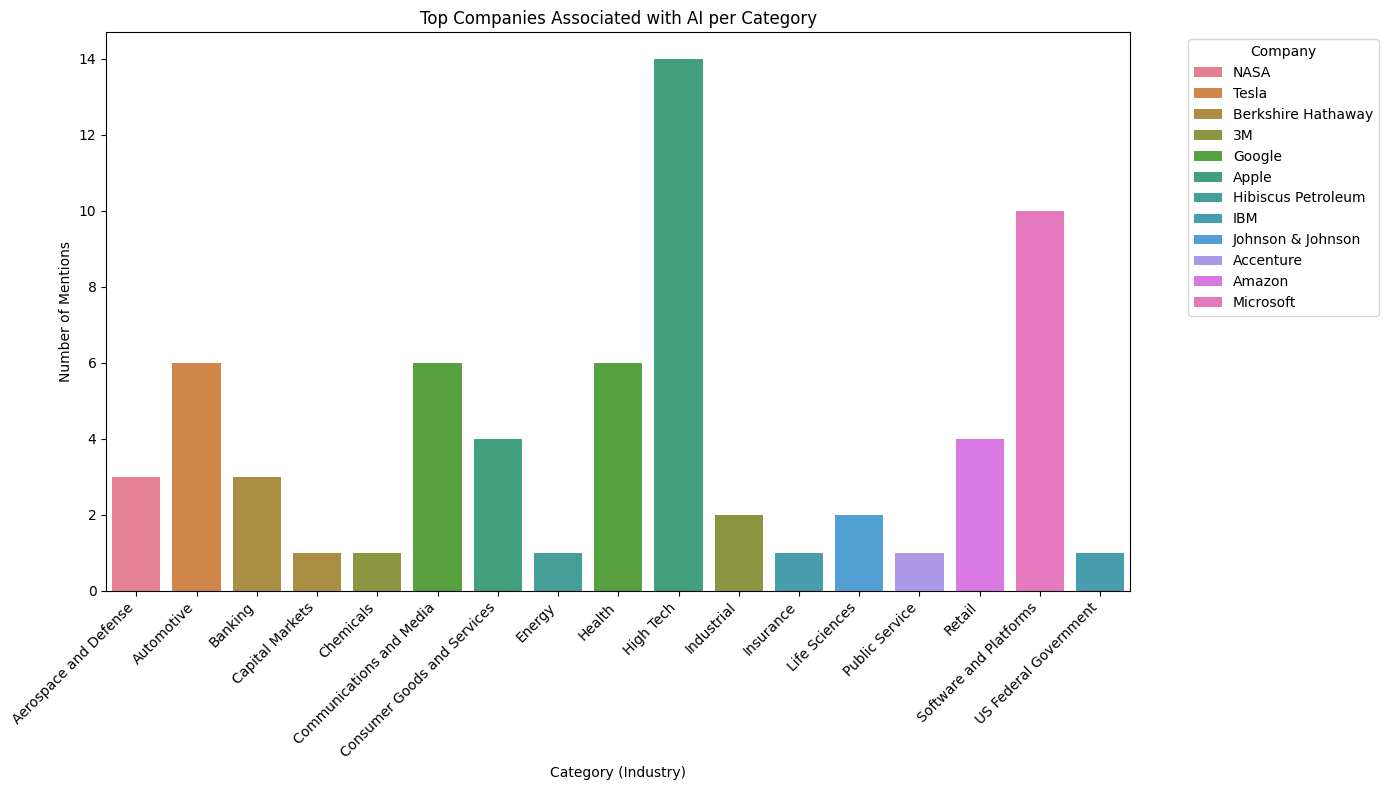

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def visualize_top_companies_with_ai_per_industry():
    """
    Visualizes the top companies per category (industry) using a grouped bar chart.
    """
    with driver.session() as session:
        result = session.run(
            """
            MATCH (org:Organization)<-[:MENTIONS]-(article:Article)-[:MENTIONS]->(keyword:Keyword),
              (org)-[:BELONGS_TO_INDUSTRY]->(industry:Industry)
            WHERE keyword.name = "AI"
            WITH industry.name AS industry_name, org.name AS organization_name, COUNT(*) AS mention_count
            ORDER BY industry_name, mention_count DESC
            WITH industry_name, COLLECT([organization_name, mention_count])[0..1] AS top_companies // Get top 1 company
            UNWIND top_companies AS top_company
            RETURN industry_name, top_company[0] AS organization_name, top_company[1] AS mention_count
            """
        )
        data = [{"industry_name": record["industry_name"], "organization_name": record["organization_name"], "mention_count": record["mention_count"]} for record in result]
        df = pd.DataFrame(data)


    plt.figure(figsize=(14, 8))
    sns.barplot(x='industry_name', y='mention_count', hue='organization_name', data=df, dodge=False)
    plt.title("Top Companies Associated with AI per Category")
    plt.xlabel("Category (Industry)")
    plt.ylabel("Number of Mentions")
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Company", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


visualize_top_companies_with_ai_per_industry()

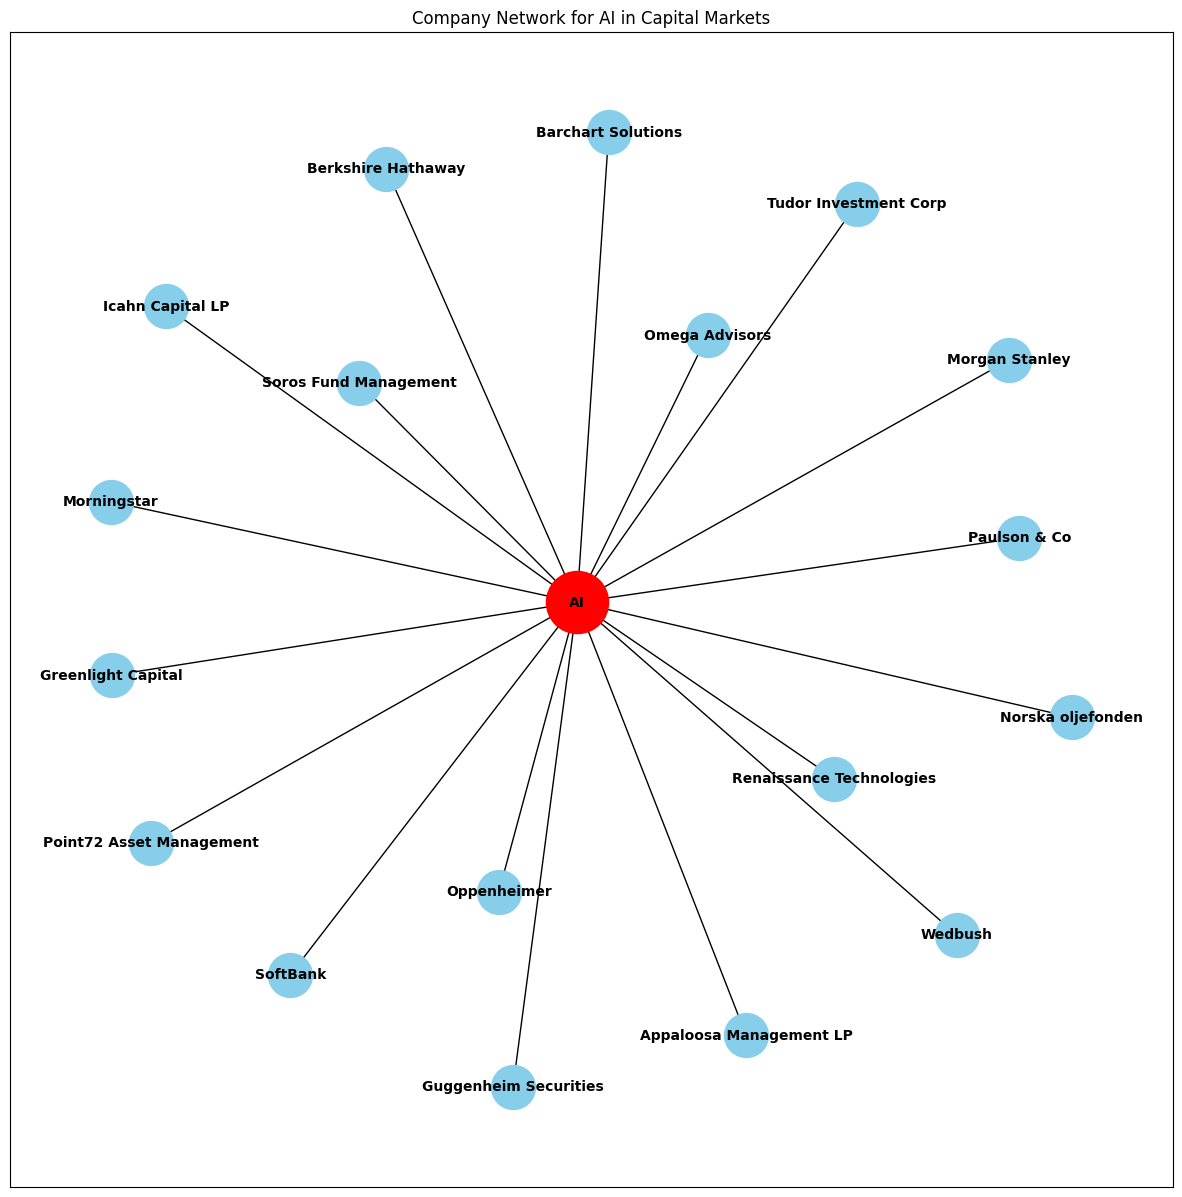

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_company_networks_by_industry():
    """
    Visualizes company networks associated with AI, separated by industry,
    with "AI" as a central node.
    """

    with driver.session() as session:
        result = session.run(
            """
            MATCH (org:Organization)<-[:MENTIONS]-(article:Article)-[:MENTIONS]->(keyword:Keyword),
                  (org)-[:BELONGS_TO_INDUSTRY]->(industry:Industry)
            WHERE keyword.name = "AI" AND industry.name = "Capital Markets"
            RETURN DISTINCT org.name AS organization_name, industry.name AS industry_name
            """
        )
        data = [{"organization_name": record["organization_name"], "industry_name": record["industry_name"]} for record in result]
        df = pd.DataFrame(data)


    industries = df['industry_name'].unique()


    for industry in industries:
        industry_df = df[df['industry_name'] == industry]
        companies = industry_df['organization_name'].tolist()


        G = nx.Graph()
        G.add_node("AI")
        G.add_nodes_from(companies)

        for company in companies:
            G.add_edge("AI", company)


        plt.figure(figsize=(15, 15))
        pos = nx.spring_layout(G)

        nx.draw_networkx_nodes(G, pos, nodelist=["AI"], node_size=2000, node_color="red")

        nx.draw_networkx_nodes(G, pos, nodelist=companies, node_size=1000, node_color="skyblue")
        nx.draw_networkx_edges(G, pos)
        nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

        plt.title(f"Company Network for AI in {industry}")
        plt.show()


visualize_company_networks_by_industry()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def visualize_top_companies_overall_trend():
    """
    Visualizes the overall trend of top companies associated with AI.
    """
    with driver.session() as session:
        result = session.run(
            """
            MATCH (org:Organization)<-[:MENTIONS]-(article:Article)
            WITH org.name AS organization_name, COUNT(*) AS total_mention_count
            ORDER BY total_mention_count DESC
            LIMIT 10 // Get top 10 companies overall
            RETURN organization_name, total_mention_count
            """
        )
        data = [{"organization_name": record["organization_name"], "total_mention_count": record["total_mention_count"]} for record in result]
        df = pd.DataFrame(data)
        print(df)

#     plt.figure(figsize=(12, 6))
#     sns.barplot(x='organization_name', y='total_mention_count', data=df, color="skyblue")
#     plt.title("Overall Trend of Top Companies per month")
#     plt.xlabel("Company")
#     plt.ylabel("Total Number of Mentions")
#     plt.xticks(rotation=45, ha='right')
#     plt.tight_layout()
#     plt.show()
visualize_top_companies_overall_trend()

  organization_name  total_mention_count
0         Microsoft                  173
1            Google                  168
2            Amazon                  142
3             Apple                  108
4          LinkedIn                  105
5            OpenAI                   90
6              Meta                   63
7               IBM                   51
8           Netflix                   47
9   The Motley Fool                   45


In [ ]:
def get_company_with_most_ai_mentions(driver):
    with driver.session() as session:
        result = session.run("""
            MATCH (org:Organization)<-[:MENTIONS]-(article:Article)-[:MENTIONS]->(keyword:Keyword)
            WHERE keyword.name = "AI"
            WITH org.name AS organization_name, COUNT(*) AS mention_count
            ORDER BY mention_count DESC

            RETURN organization_name, mention_count
            """)
        return result.data()

result = get_company_with_most_ai_mentions(driver)
print(result)

[{'organization_name': 'Google', 'mention_count': 3}, {'organization_name': 'Parasoft', 'mention_count': 2}, {'organization_name': 'Sonatype', 'mention_count': 2}, {'organization_name': 'Gravitee', 'mention_count': 2}, {'organization_name': 'SD Times', 'mention_count': 2}, {'organization_name': 'Synopsys', 'mention_count': 2}, {'organization_name': 'TikTok', 'mention_count': 2}, {'organization_name': 'Apple', 'mention_count': 2}, {'organization_name': 'The Economist Newspaper Limited', 'mention_count': 2}, {'organization_name': 'Amazon', 'mention_count': 2}, {'organization_name': 'Microsoft', 'mention_count': 2}, {'organization_name': 'OpenAI', 'mention_count': 1}, {'organization_name': 'The Associated Press', 'mention_count': 1}, {'organization_name': 'Reddit', 'mention_count': 1}, {'organization_name': 'Twitter', 'mention_count': 1}, {'organization_name': 'Snopes Media Group Inc.', 'mention_count': 1}, {'organization_name': 'IBM', 'mention_count': 1}, {'organization_name': 'New Relic

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
def visualize_top_companies_trend_bar():
    """
    Visualizes the trend of top companies associated with AI mentioned per month using a bar graph.
    """
    with driver.session() as session:
        result = session.run(
            """
            MATCH (org:Organization)<-[:MENTIONS]-(article:Article)-[:MENTIONS]->(keyword:Keyword)
            WHERE keyword.name = "AI"
            WITH org.name AS organization_name, date(article.publication_date).month AS month, COUNT(*) AS mention_count
            ORDER BY month, mention_count DESC
            WITH month, COLLECT([organization_name, mention_count])[50..100] AS top_companies
            UNWIND top_companies AS top_company
            RETURN month, top_company[0] AS organization_name, top_company[1] AS mention_count

            """
        )
        data = [{"month": record["month"], "organization_name": record["organization_name"], "mention_count": record["mention_count"]} for record in result]
        df = pd.DataFrame(data)


    df['month'] = df['month'].apply(lambda x: pd.to_datetime(f'{x}', format='%m').strftime('%B'))


    plt.figure(figsize=(14, 8))
    sns.barplot(x='month', y='mention_count', hue='organization_name', data=df)
    plt.title("Trend of Top Companies Associated with AI Mentioned per Month")
    plt.xlabel("Month")
    plt.ylabel("Number of Mentions")
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Company")
    plt.tight_layout()
    plt.show()

Top 10 Companies Associated with AI (Overall):
    organization_name  mention_count
0              Google              3
1            Parasoft              2
2            Sonatype              2
3            Gravitee              2
4            SD Times              2
..                ...            ...
127               AMD              1
128              Meta              1
129          Alphabet              1
130            Nvidia              1
131           InVideo              1

[132 rows x 2 columns]


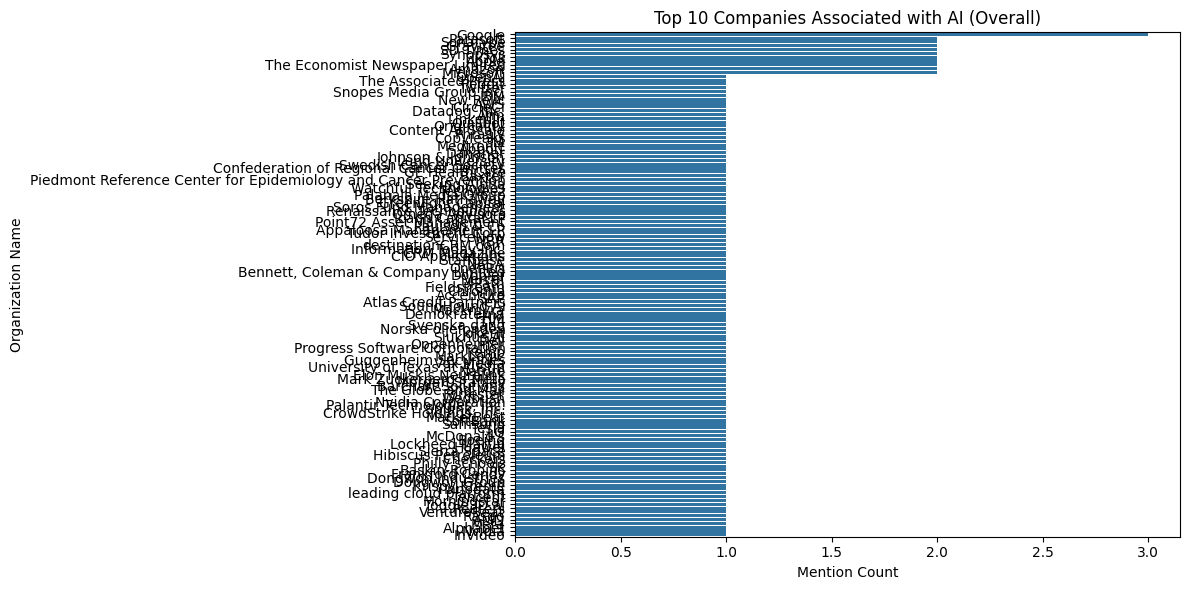

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def visualize_top_companies_trend_bar():
    """
    Visualizes the overall trend of top companies associated with AI mentioned using a bar graph and prints the results.

    """
    with driver.session() as session:
        # Query to retrieve AI mentions for capital market companies
        result = session.run(
            """
            MATCH (org:Organization)<-[:MENTIONS]-(article:Article)-[:MENTIONS]->(keyword:Keyword),
                  (org)-[:BELONGS_TO_INDUSTRY]->(industry:Industry)
            WHERE keyword.name = "AI" AND industry.name = "Banking"
            WITH org.name AS organization_name, COUNT(*) AS mention_count
            // Add a filter for positive sentiments (adjust sentiment_score property accordingly)
            AND article.sentiment_score > 0
            ORDER BY mention_count DESC
            RETURN organization_name, mention_count
            LIMIT 10 // Limit to top 10 companies
            """
        )

    # Convert the result to a Pandas DataFrame
df = pd.DataFrame([record.values() for record in result], columns=["organization_name", "mention_count"])

    # Print the results
print("Top 10 Companies Associated with AI (Overall):")
print(df)

    # Create the bar graph using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x="mention_count", y="organization_name", data=df)
plt.title("Top 10 Companies Associated with AI (Overall)")
plt.xlabel("Mention Count")
plt.ylabel("Organization Name")
plt.tight_layout()
plt.show()

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_company_networks_by_industry():
    """
    Visualizes company networks associated with AI, separated by industry,
    with "AI" as a central node.
    """

    with driver.session() as session:
        result = session.run(
            """
            MATCH (org:Organization)<-[:MENTIONS]-(article:Article)-[:MENTIONS]->(keyword:Keyword),
                  (org)-[:BELONGS_TO_INDUSTRY]->(industry:Industry)
            WHERE keyword.name = "AI" AND industry.name = "Capital Markets" AND
            RETURN DISTINCT org.name AS organization_name, industry.name AS industry_name
            """
        )
        data = [{"organization_name": record["organization_name"], "industry_name": record["industry_name"]} for record in result]
        df = pd.DataFrame(data)


    industries = df['industry_name'].unique()


    for industry in industries:
        industry_df = df[df['industry_name'] == industry]
        companies = industry_df['organization_name'].tolist()


        G = nx.Graph()
        G.add_node("AI")
        G.add_nodes_from(companies)

        for company in companies:
            G.add_edge("AI", company)


        plt.figure(figsize=(15, 15))
        pos = nx.spring_layout(G)

        nx.draw_networkx_nodes(G, pos, nodelist=["AI"], node_size=2000, node_color="red")

        nx.draw_networkx_nodes(G, pos, nodelist=companies, node_size=1000, node_color="skyblue")
        nx.draw_networkx_edges(G, pos)
        nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

        plt.title(f"Company Network for AI in {industry}")
        plt.show()


visualize_company_networks_by_industry()

In [ ]:
import pandas as pd
from neo4j import GraphDatabase

def get_top_organizations_by_mentions(limit=100):
    """
    Fetches the top N most mentioned organizations.
    """
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[:MENTIONS]->(k:Keyword), (a)-[:MENTIONS]->(o:Organization)-[:BELONGS_TO_INDUSTRY]->(i:Industry {name: 'Capital Markets'})

            RETURN o.name AS organization, COUNT(a) AS mention_count
            ORDER BY mention_count DESC
            LIMIT $limit
            """,
            parameters={"limit": limit}
        )

        data = [{"organization": record["organization"], "mention_count": record["mention_count"]} for record in result]
        df = pd.DataFrame(data)
        return df

def get_sentiment_for_top_organizations(organizations):
    """
    Fetches the average sentiment for a given list of organizations.
    """
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[:MENTIONS]->(k:Keyword), (a)-[:MENTIONS]->(o:Organization)-[:BELONGS_TO_INDUSTRY]->(i:Industry)
            WHERE o.name IN $organizations AND a.sentiment IS NOT NULL AND toFloat(a.sentiment) IS NOT NULL AND k.name = "AI"
            RETURN o.name AS organization, AVG(a.sentiment) AS avg_sentiment
            ORDER BY avg_sentiment DESC
            """,
            parameters={"organizations": organizations}
        )

        data = [{"organization": record["organization"], "avg_sentiment": record["avg_sentiment"]} for record in result]
        df = pd.DataFrame(data)
        return df

# Step 1: Get the top 10 most mentioned organizations
top_organizations_df = get_top_organizations_by_mentions()
top_organizations_list = top_organizations_df['organization'].tolist()

# Step 2: Get the average sentiment for these top organizations
sentiment_by_organization_df = get_sentiment_for_top_organizations(top_organizations_list)

# Display the DataFrame
display(sentiment_by_organization_df)

top_keywords = sentiment_by_organization_df.nlargest(3, 'avg_sentiment')
worst_keywords = sentiment_by_organization_df.nsmallest(3, 'avg_sentiment')

# Combine top and worst keywords for visualization
selected_keywords = pd.concat([top_keywords, worst_keywords])

print("Top 3 Keywords:")
print(top_keywords)

print("\nWorst 3 Keywords:")
print(worst_keywords)

organization  avg_sentiment
0            Oppenheimer           0.75
1  Guggenheim Securities           0.75
2     Berkshire Hathaway           0.70
3         Morgan Stanley           0.50
4     Barchart Solutions           0.50
5                Wedbush           0.50
6               SoftBank           0.15
7            Morningstar          -0.50

Top 3 Keywords:
            organization  avg_sentiment
0            Oppenheimer           0.75
1  Guggenheim Securities           0.75
2     Berkshire Hathaway           0.70

Worst 3 Keywords:
     organization  avg_sentiment
7     Morningstar          -0.50
6        SoftBank           0.15
3  Morgan Stanley           0.50


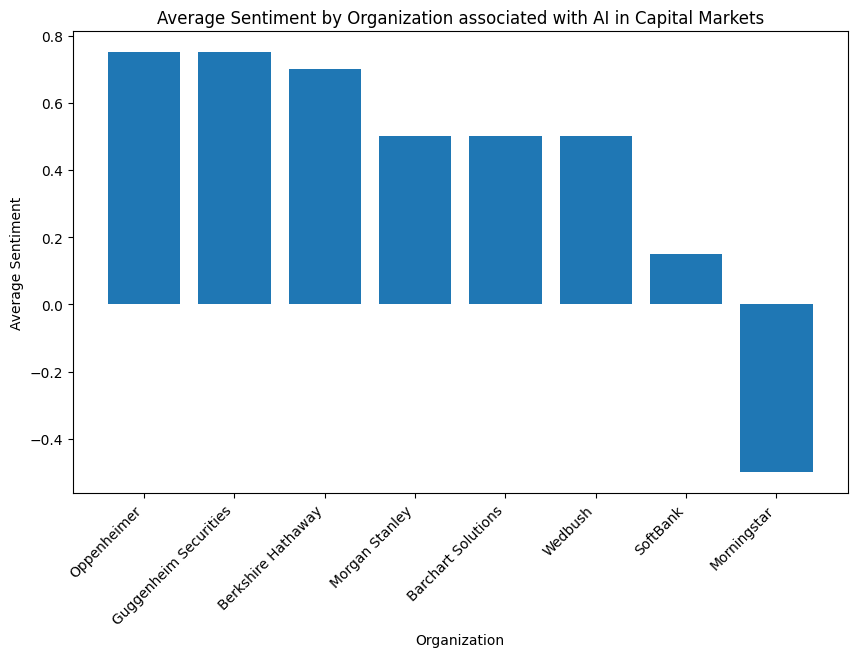

In [ ]:
# @title Average Sentiment by Organization associated with AI in Capital Markets

import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'sentiment_by_organization_df'

plt.figure(figsize=(10, 6))
plt.bar(sentiment_by_organization_df['organization'], sentiment_by_organization_df['avg_sentiment'])
plt.xlabel('Organization')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment by Organization associated with AI in Capital Markets')
_ = plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

In [ ]:
def query_keyword_sentiment_banking():
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Article)-[:MENTIONS]->(k:Keyword),
                  (a)-[:MENTIONS]->(:Organization{name: 'Morningstar'})-[:BELONGS_TO_INDUSTRY]->(i:Industry {name: 'Capital Markets'})
            WHERE a.sentiment IS NOT NULL
            RETURN k.name AS Keyword, AVG(a.sentiment) AS AvgSentiment, COUNT(a) AS MentionCount
            ORDER BY AvgSentiment DESC
            """
        )

        # Convert the query results to a DataFrame
        data = [{"Keyword": record["Keyword"], "AvgSentiment": record["AvgSentiment"]} for record in result]
        return pd.DataFrame(data)

# Fetch data
banking_sentiment_df = query_keyword_sentiment_banking()


# Identify the top 3 and worst 3 keywords based on average sentiment
top_keywords = banking_sentiment_df.nlargest(3, 'AvgSentiment')
worst_keywords = banking_sentiment_df.nsmallest(3, 'AvgSentiment')

# Combine top and worst keywords for visualization
selected_keywords = pd.concat([top_keywords, worst_keywords])

print("Top 3 Keywords:")
print(top_keywords)

print("\nWorst 3 Keywords:")
print(worst_keywords)

Top 3 Keywords:
      Keyword  AvgSentiment
0   community          -0.5
1  technology          -0.5
2      access          -0.5

Worst 3 Keywords:
      Keyword  AvgSentiment
0   community          -0.5
1  technology          -0.5
2      access          -0.5
